# Exploratory data analysis

##### Input: 

Raw data: `week_02/train.csv`

##### Output: 
1. Train: `/project/data/df_train.csv`
2. Test: `/project/data/df_test.csv`


### Import packages

In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.style as style


from scipy import stats
import glob 
from sklearn.model_selection import train_test_split
%matplotlib inline
import cufflinks as cf

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Set paths

In [2]:
print(f'current path is: {os.getcwd()}')

directory = "project" 
project = 'project_02/data' 
parent_dir = '/Users/ilonanietosvaara/Documents/Kurssit/spiced/spiced_projects/scikit-cilantro-student-code/week_02/' 
data_path = os.path.join(parent_dir, project)

print(f'Project data path set to: {data_path}')

current path is: /Users/ilonanietosvaara/Documents/Kurssit/spiced/spiced_projects/scikit-cilantro-student-code/week_02/project_02
Project data path set to: /Users/ilonanietosvaara/Documents/Kurssit/spiced/spiced_projects/scikit-cilantro-student-code/week_02/project_02/data


### Read in data

In [3]:
df_orig = pd.read_csv(f'{data_path}/dataset.csv')
df = df_orig.copy() # Have original data in separate dataframe in case

### Basic information about data

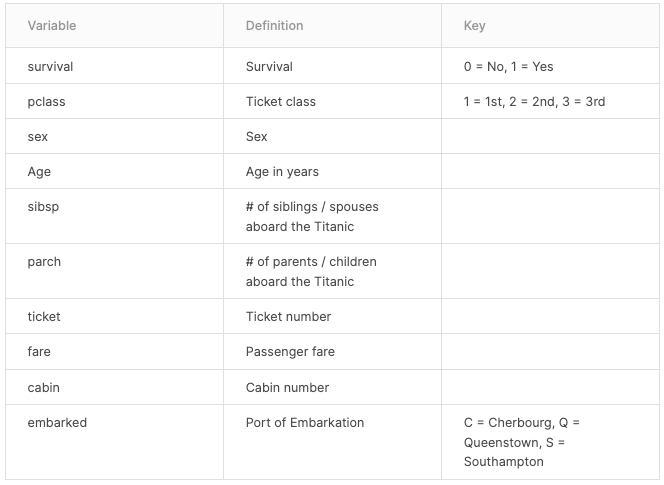


## Split data into train and test


In [4]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state = 10)

In [5]:
 df_train.shape, df_test.shape

((712, 12), (179, 12))

## Save test and train

In [6]:
# Save train
df_train.to_csv(os.path.join(data_path, 'train.csv'), index= True)

# Save test
df_test.to_csv(os.path.join(data_path, 'test.csv'), index= True)


## Explore the data

In [7]:
df_train.head()

PassengerId  Survived  Pclass  \
57            58         0       3   
717          718         1       2   
431          432         1       3   
633          634         0       1   
163          164         0       3   

                                                  Name     Sex   Age  SibSp  \
57                                 Novel, Mr. Mansouer    male  28.5      0   
717                Troutt, Miss. Edwina Celia "Winnie"  female  27.0      0   
431  Thorneycroft, Mrs. Percival (Florence Kate White)  female   NaN      1   
633                      Parr, Mr. William Henry Marsh    male   NaN      0   
163                                    Calic, Mr. Jovo    male  17.0      0   

     Parch  Ticket     Fare Cabin Embarked  
57       0    2697   7.2292   NaN        C  
717      0   34218  10.5000  E101        S  
431      0  376564  16.1000   NaN        S  
633      0  112052   0.0000   NaN        S  
163      0  315093   8.6625   NaN        S

In [8]:
df_train.Age.describe()

count    577.000000
mean      29.668544
std       14.427861
min        0.420000
25%       21.000000
50%       28.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
df_train.describe(include=object)

NumExpr defaulting to 4 threads.


Name   Sex    Ticket Cabin Embarked
count                   712   712       712   158      710
unique                  712     2       562   121        3
top     LeRoy, Miss. Bertha  male  CA. 2343    G6        S
freq                      1   454         7     4      523

In [10]:
# Descriptive stats on Sex 
df_train.groupby('Sex').count()

PassengerId  Survived  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex                                                                            
female          258       258     258   258  218    258    258     258   258   
male            454       454     454   454  359    454    454     454   454   

        Cabin  Embarked  
Sex                      
female     76       256  
male       82       454

In [11]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Survival rate by sex

In [77]:
total = df_train['PassengerId'].count()
men_total = df_train['PassengerId'].loc[(df_train.Sex == 'male')].count()
print(f'{men_total} of all passengers ({total}) were men')

454 of all passengers (712) were men


In [79]:
total = df_train['PassengerId'].count()
women_total = df_train['PassengerId'].loc[(df_train.Sex == 'female')].count()
print(f'{women_total} of all passengers ({total}) were women')

258 of all passengers (712) were women


In [80]:
male_survival_rate = (df_train['PassengerId'].loc[(df_train.Sex == 'male') 
                                  & (df_train.Survived == 1)].count() / df_train['PassengerId'].loc[df_train.Sex == 'male'].count())*100
print(f'{male_survival_rate} % of all male passengers survived')

19.823788546255507 % of all male passengers survived


In [82]:
female_survival_rate = (df_train['PassengerId'].loc[(df_train.Sex == 'female') &
                                                   (df_train.Survived == 1)].count() / df_train['PassengerId'].loc[df_train.Sex == 'female'].count())*100

print(f'{female_survival_rate} % of all female passengers survived')

73.64341085271317 % of all female passengers survived


## Exploratory data analysis, plotting


In [12]:
# Basic plot settings

mpl.rcParams['figure.figsize'] = (6,7) # Set figure size
#%config InlineBackend.figure_format = 'retina' #improve resolution
sns.set_style("whitegrid")

#### Pairplot of all features

In [13]:
mpl.rcParams['figure.dpi']= 600
sns.pairplot(df_train, hue = 'Survived')

#### Pie chart on survived passengers by class

In [14]:
def label_function(val):
    ''' Returns absolute numbers and percentages of suvived to be used in pie chart
    '''
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'


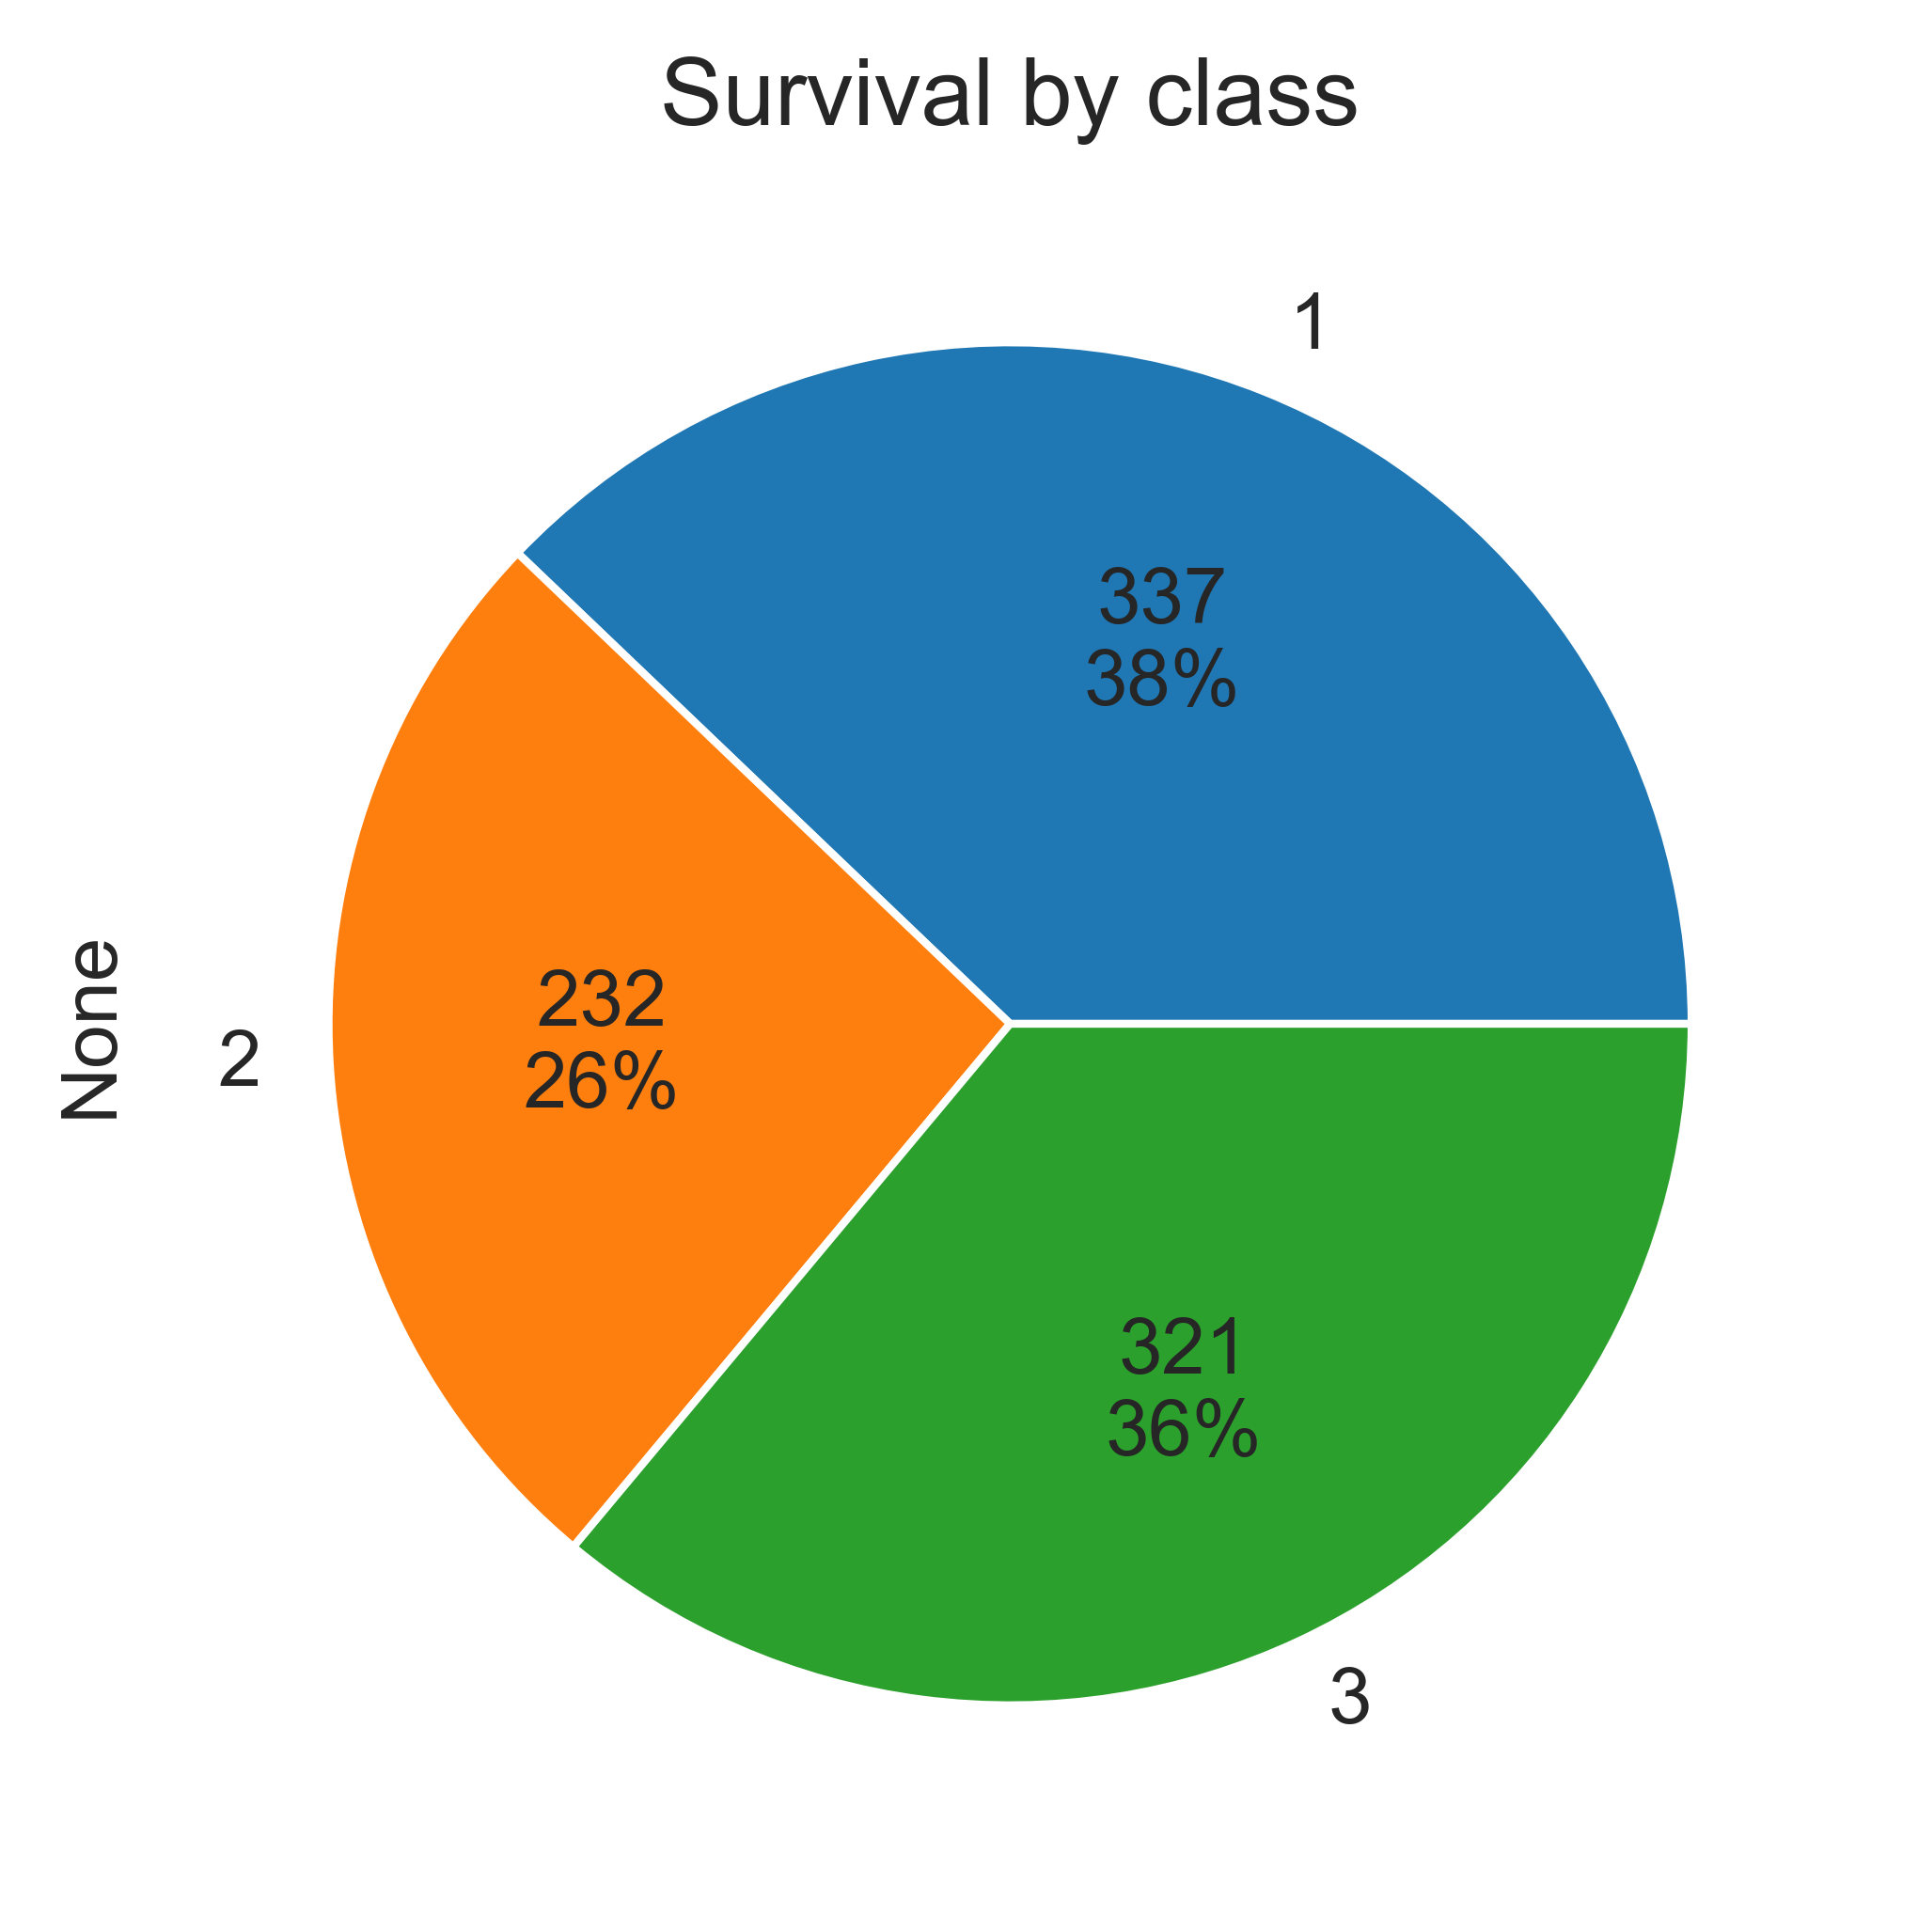

In [15]:
#mini df with only survived
survived = df_train[df_train['Survived']==1]

# Pie chart on survived passengers by class
fig, ax = plt.subplots(ncols = 1, figsize = (4,4))
survived.groupby('Pclass').size().plot(kind = 'pie', autopct=label_function, textprops={'fontsize': 10}, ax = ax)
ax.set_title('Survival by class')
plt.show()

In [26]:
# Bin ages for plotting
df_train['age_bin'] = np.nan

def bin_age(df):
    '''
    Create for each passenger an age bin - 
    1. Infant: below 13 years old
    2. Children: below 13 years old
    3. Young: between 13 -28 y
    4. Adult: between 28-44
    5. Old: above 44
    '''
    df['age_bin'].loc[df['Age'] <= 5] = 1
    df['age_bin'].loc[(df['Age'] > 5) & (df['Age'] <= 13)] = 2
    df['age_bin'].loc[(df['Age'] > 13) & (df['Age'] <= 28)] = 3
    df['age_bin'].loc[(df['Age'] > 28) & (df['Age'] <= 44)] = 4
    df['age_bin'].loc[df['Age'] > 44] = 5
    return df['age_bin']

df_train['age_bin'] = bin_age(df_train)
df_train['age_bin'] = df_train['age_bin'].astype('Int64')

In [27]:
df_train['age_bin'].unique()

<IntegerArray>
[4, 3, <NA>, 5, 1, 2]
Length: 6, dtype: Int64

#### Barplot of survived by sex

Text(0.5, 1.0, 'Total number of passengers by class')

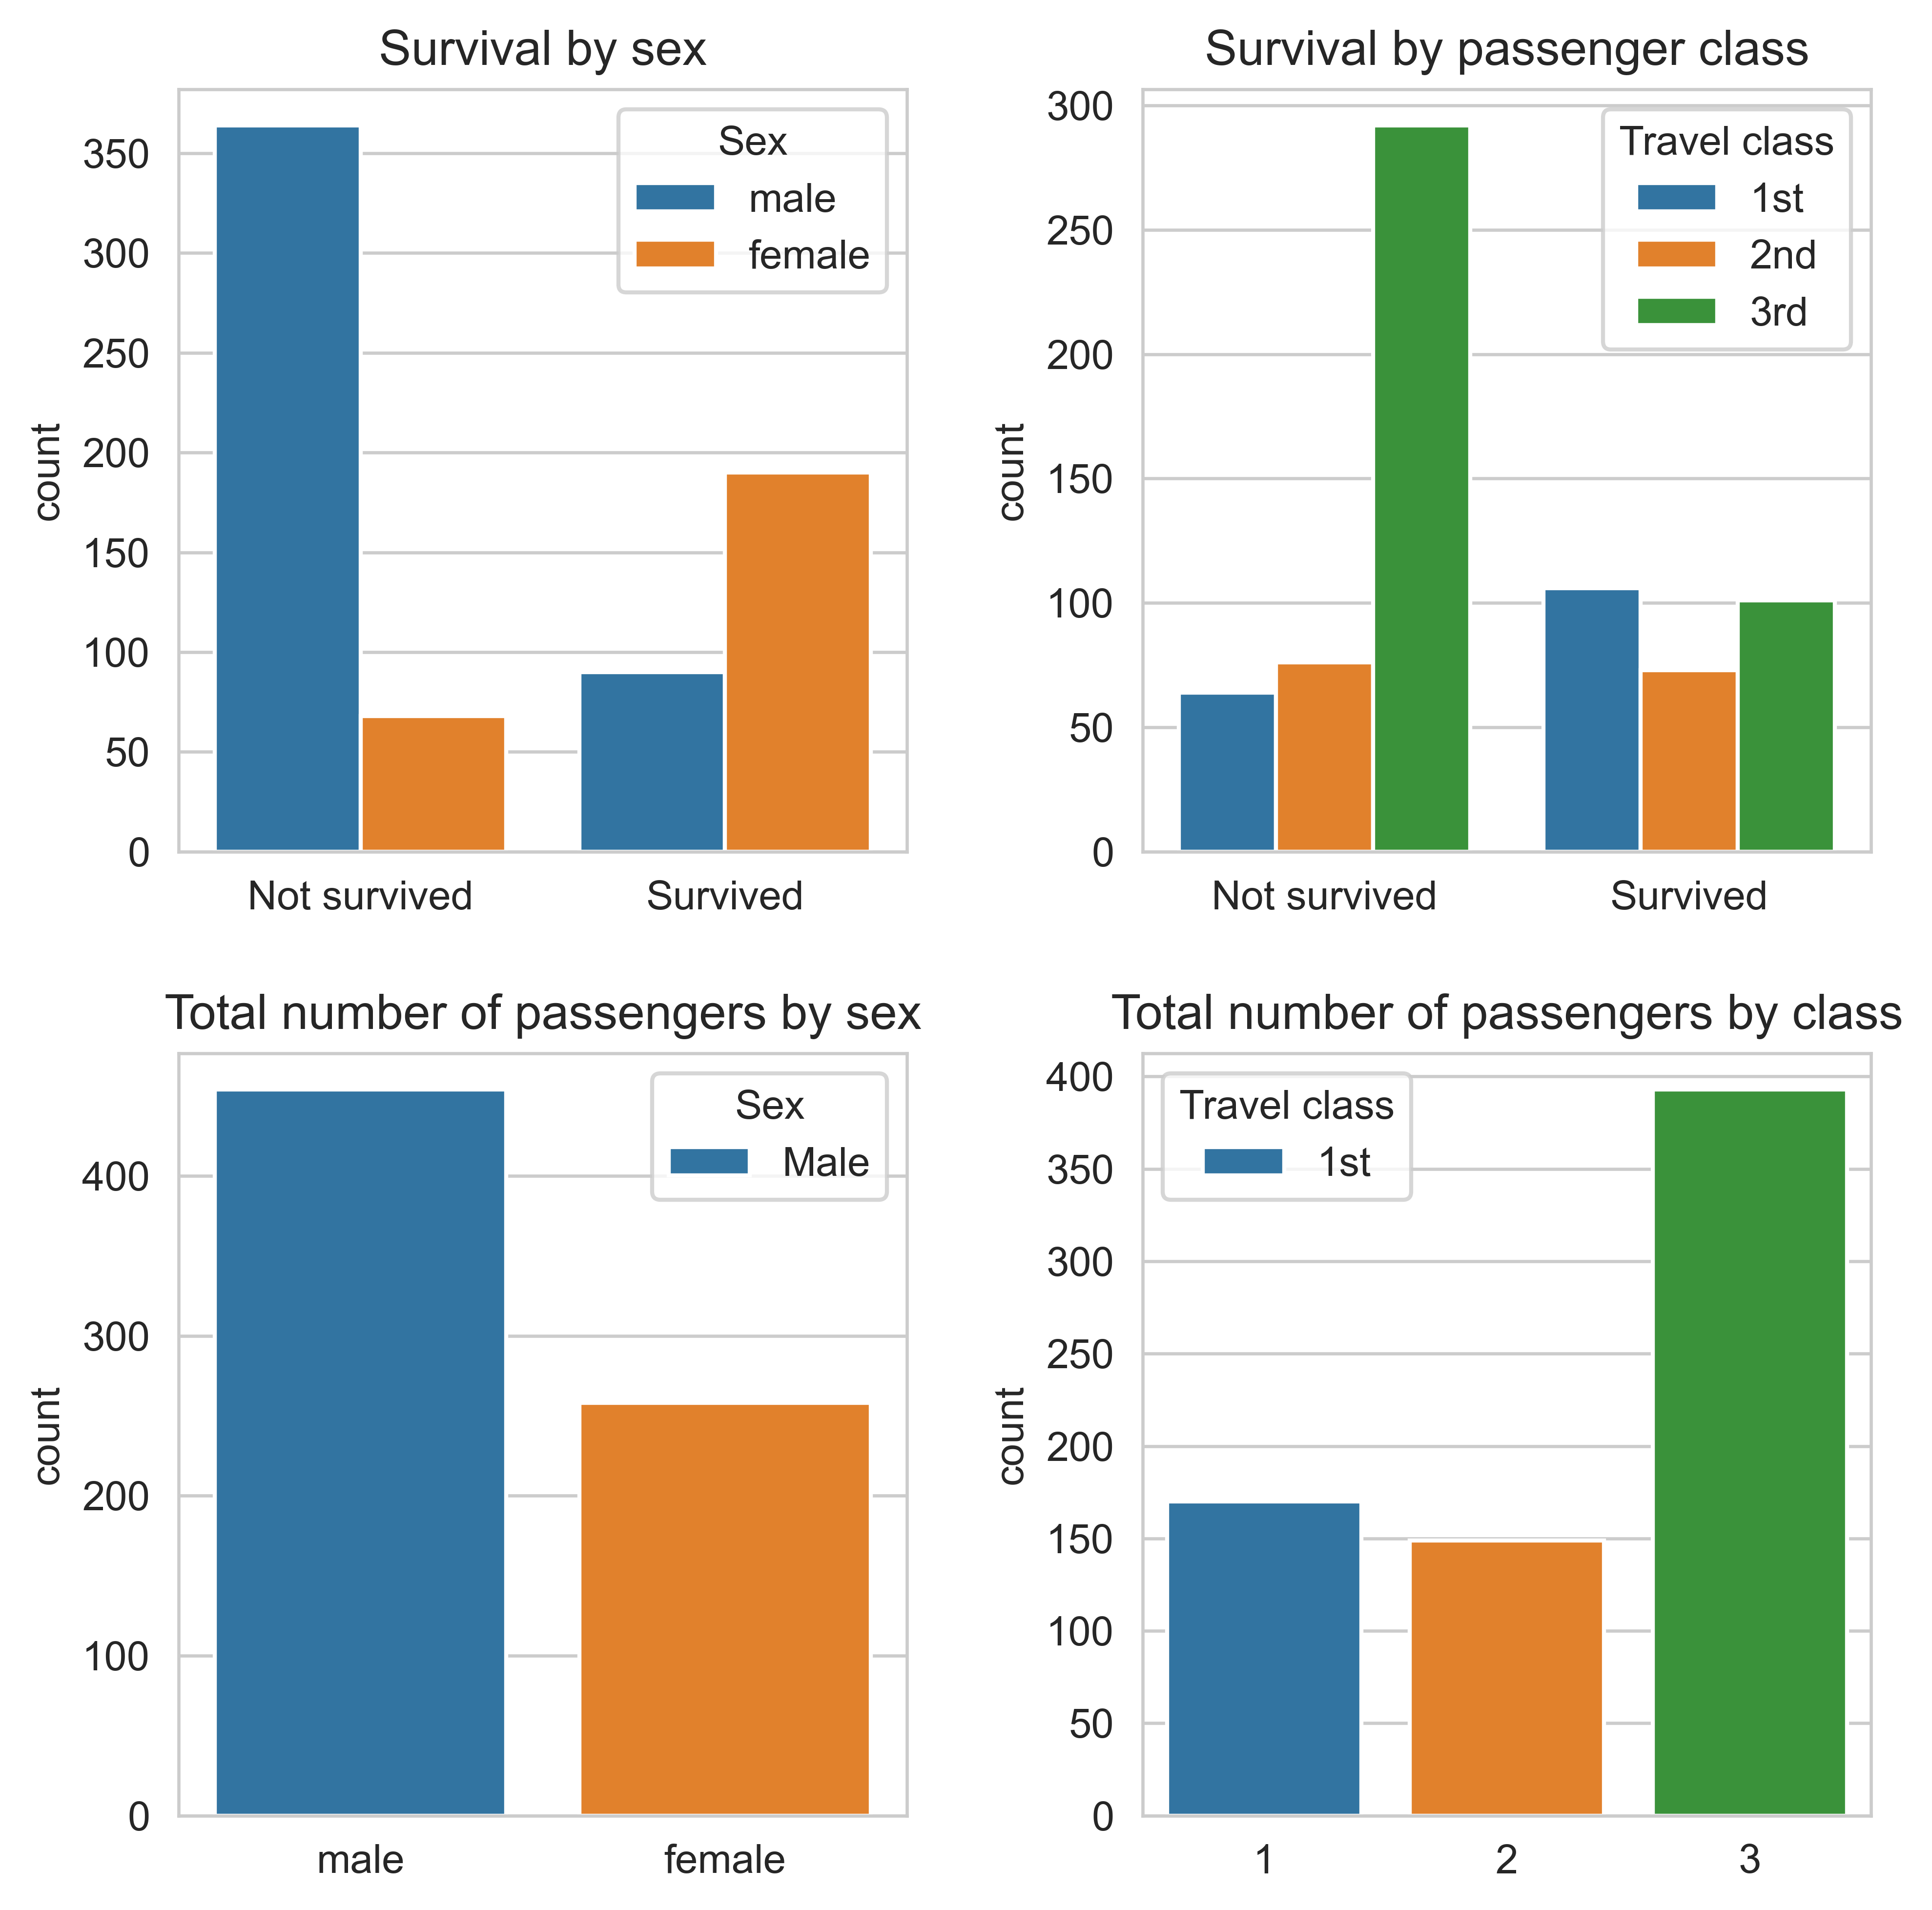

In [50]:
# Put all in subplots

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
fig.tight_layout(pad=3)

# Plot 1: survived passegers by sex
ax[0, 0] = sns.countplot(x = 'Survived', hue = 'Sex', data = df_train, ax=ax[0,0])
#Modifications to countplot 
ax[0, 0].set(xlabel=None)
ax[0, 0].set(xticks=([0, 1]))
ax[0, 0].set(xticklabels=(['Not survived', 'Survived']))
ax[0, 0].set_title('Survival by sex')


# Plot2: Survived passengers by class 
#fig, ax = plt.subplots(ncols = 1, figsize = (12, 6))
ax[0, 1] = sns.countplot(x = 'Survived', hue = 'Pclass', data = df_train, ax=ax[0,1])

ax[0, 1].set(xlabel=None)
ax[0, 1].set(xticks=([0, 1]))
ax[0, 1].set(xticklabels=(['Not survived', 'Survived']))

ax[0, 1].yaxis.grid(True) # Show the horizontal gridlines
ax[0, 1].xaxis.grid(False) # Hide the vertical gridlines

ax[0, 1].legend(['1st','2nd','3rd'], title = "Travel class")
ax[0, 1].set_title('Survival by passenger class')


# Plot4: Number of total passengers by sex 

ax[1, 0] = sns.countplot(df_train['Sex'], ax=ax[1,0])

ax[1, 0].set(xlabel=None)

ax[1, 0].yaxis.grid(True) # Show the horizontal gridlines
ax[1, 0].xaxis.grid(False) # Hide the vertical gridlines
ax[1, 0].set_title('Total number of passengers by sex')



# Plot4: Number of total passengers by class 

ax[1, 1] = sns.countplot(df_train['Pclass'], ax=ax[1,1])

ax[1, 1].set(xlabel=None)

ax[1, 1].yaxis.grid(True) # Show the horizontal gridlines
ax[1, 1].xaxis.grid(False) # Hide the vertical gridlines
ax[1, 1].set_title('Total number of passengers by class')




In [53]:
mylabels =['0-5','6-12','13-28', '29-44', '>45']

In [ ]:
ax.legend(labels=mylabels)

No handles with labels found to put in legend.


[Text(0.5, 358.33333333333337, '')]

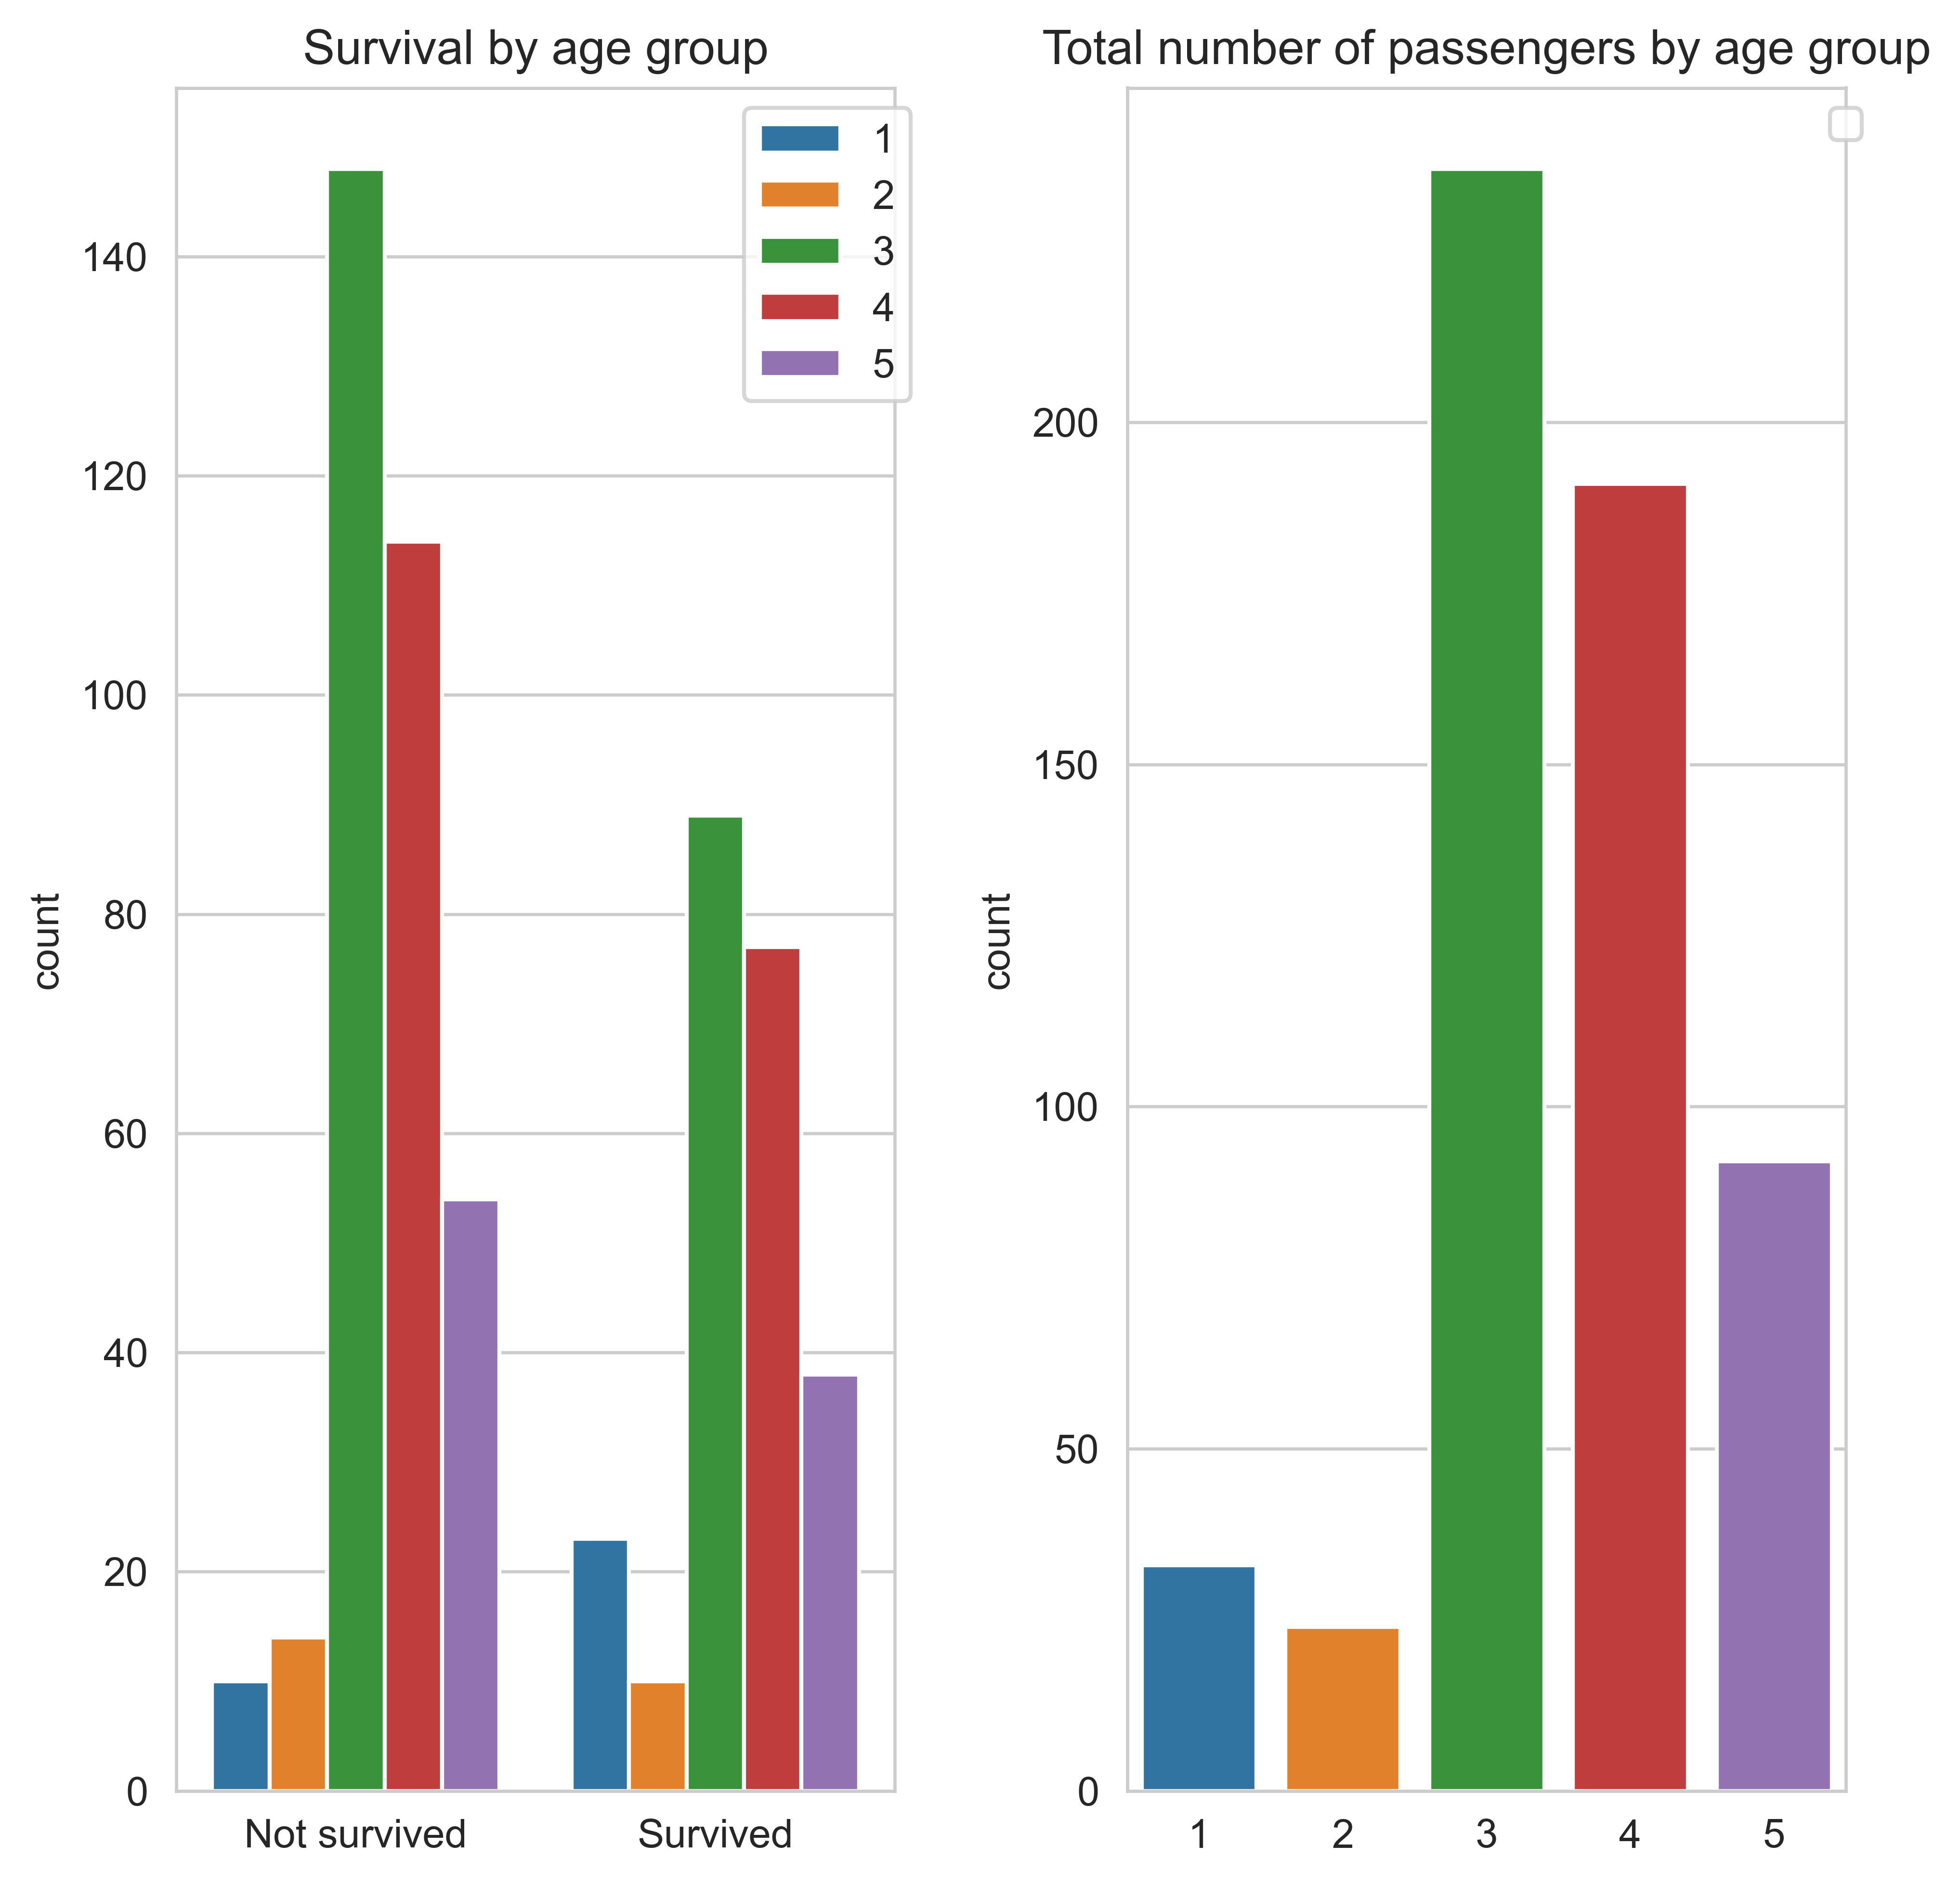

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 7))
fig.tight_layout(pad=3)


# Plot1: Survived passengers by age 
ax[0] = sns.countplot(x = 'Survived', hue = 'age_bin', data = df_train[df_train['age_bin'].notna()], ax=ax[0])

ax[0].set(xlabel=None)
ax[0].set(xticks=([0, 1]))
ax[0].set(xticklabels=(['Not survived', 'Survived']))

ax[0].yaxis.grid(True) # Show the horizontal gridlines
ax[0].xaxis.grid(False) # Hide the vertical gridlines
ax[0].set_title('Survival by age group')


ax[0].legend(['0-5','6-12','13-28', '29-44', '>45'], title = "Age group")
ax[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper right')


# Plot2: All passengers by age 
#ax[0, 1] = sns.countplot(x = 'Survived', hue = 'age_bin', data = df_train[df_train['age_bin'].notna()], ax=ax[1,0])

ax[1] = sns.countplot(df_train['age_bin'][df_train['age_bin'].notna()], ax=ax[1])

ax[1].yaxis.grid(True) # Show the horizontal gridlines
ax[1].xaxis.grid(False) # Hide the vertical gridlines
ax[1].set_title('Total number of passengers by age group')


ax[1].legend(labels = mylabels, title = "Age group")
ax[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper right')
ax[1].set(xlabel=None)

### Correlation heatmap

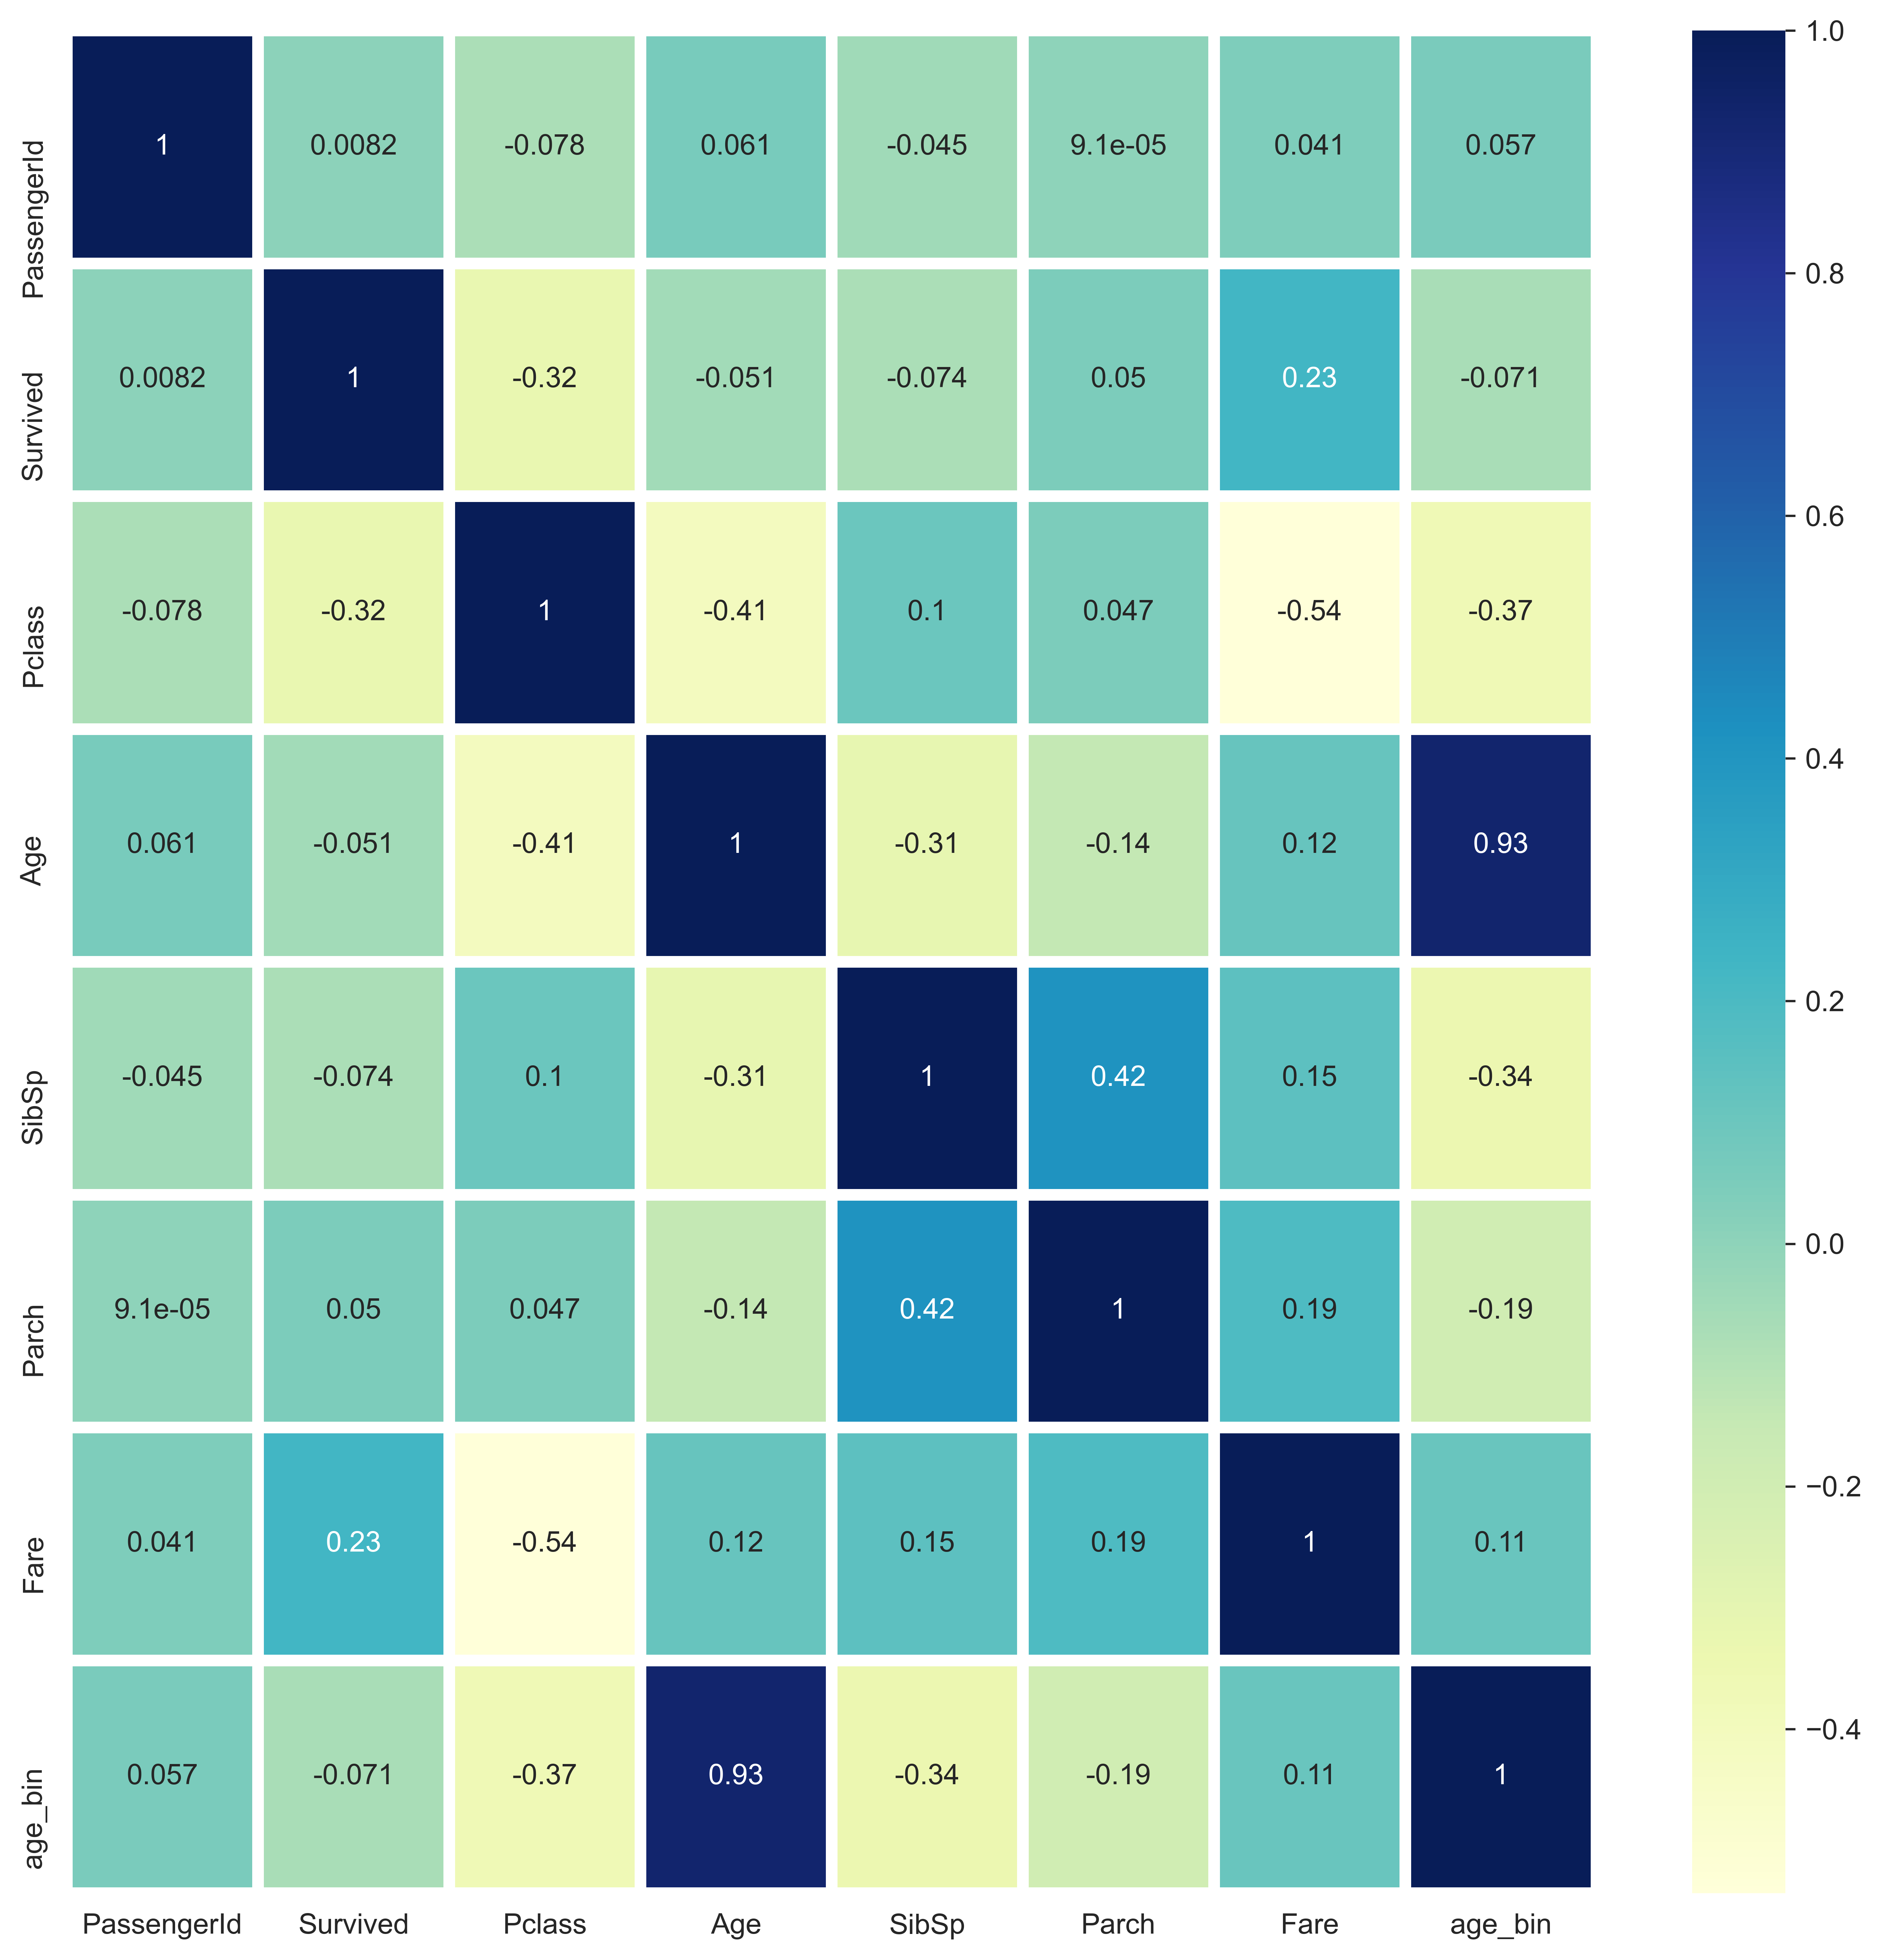

In [88]:
fig, ax = plt.subplots(ncols = 1, figsize = (12, 12)) 

# Best correlation is with Fare (0.23)

sns.heatmap(df_train.corr(),annot = True, cmap="YlGnBu", linewidths=4)
plt.savefig('sns_heatmap.png', dpi=150)

#### Histogram showing the age distribution of passengers

Text(0, 0.5, 'Density')

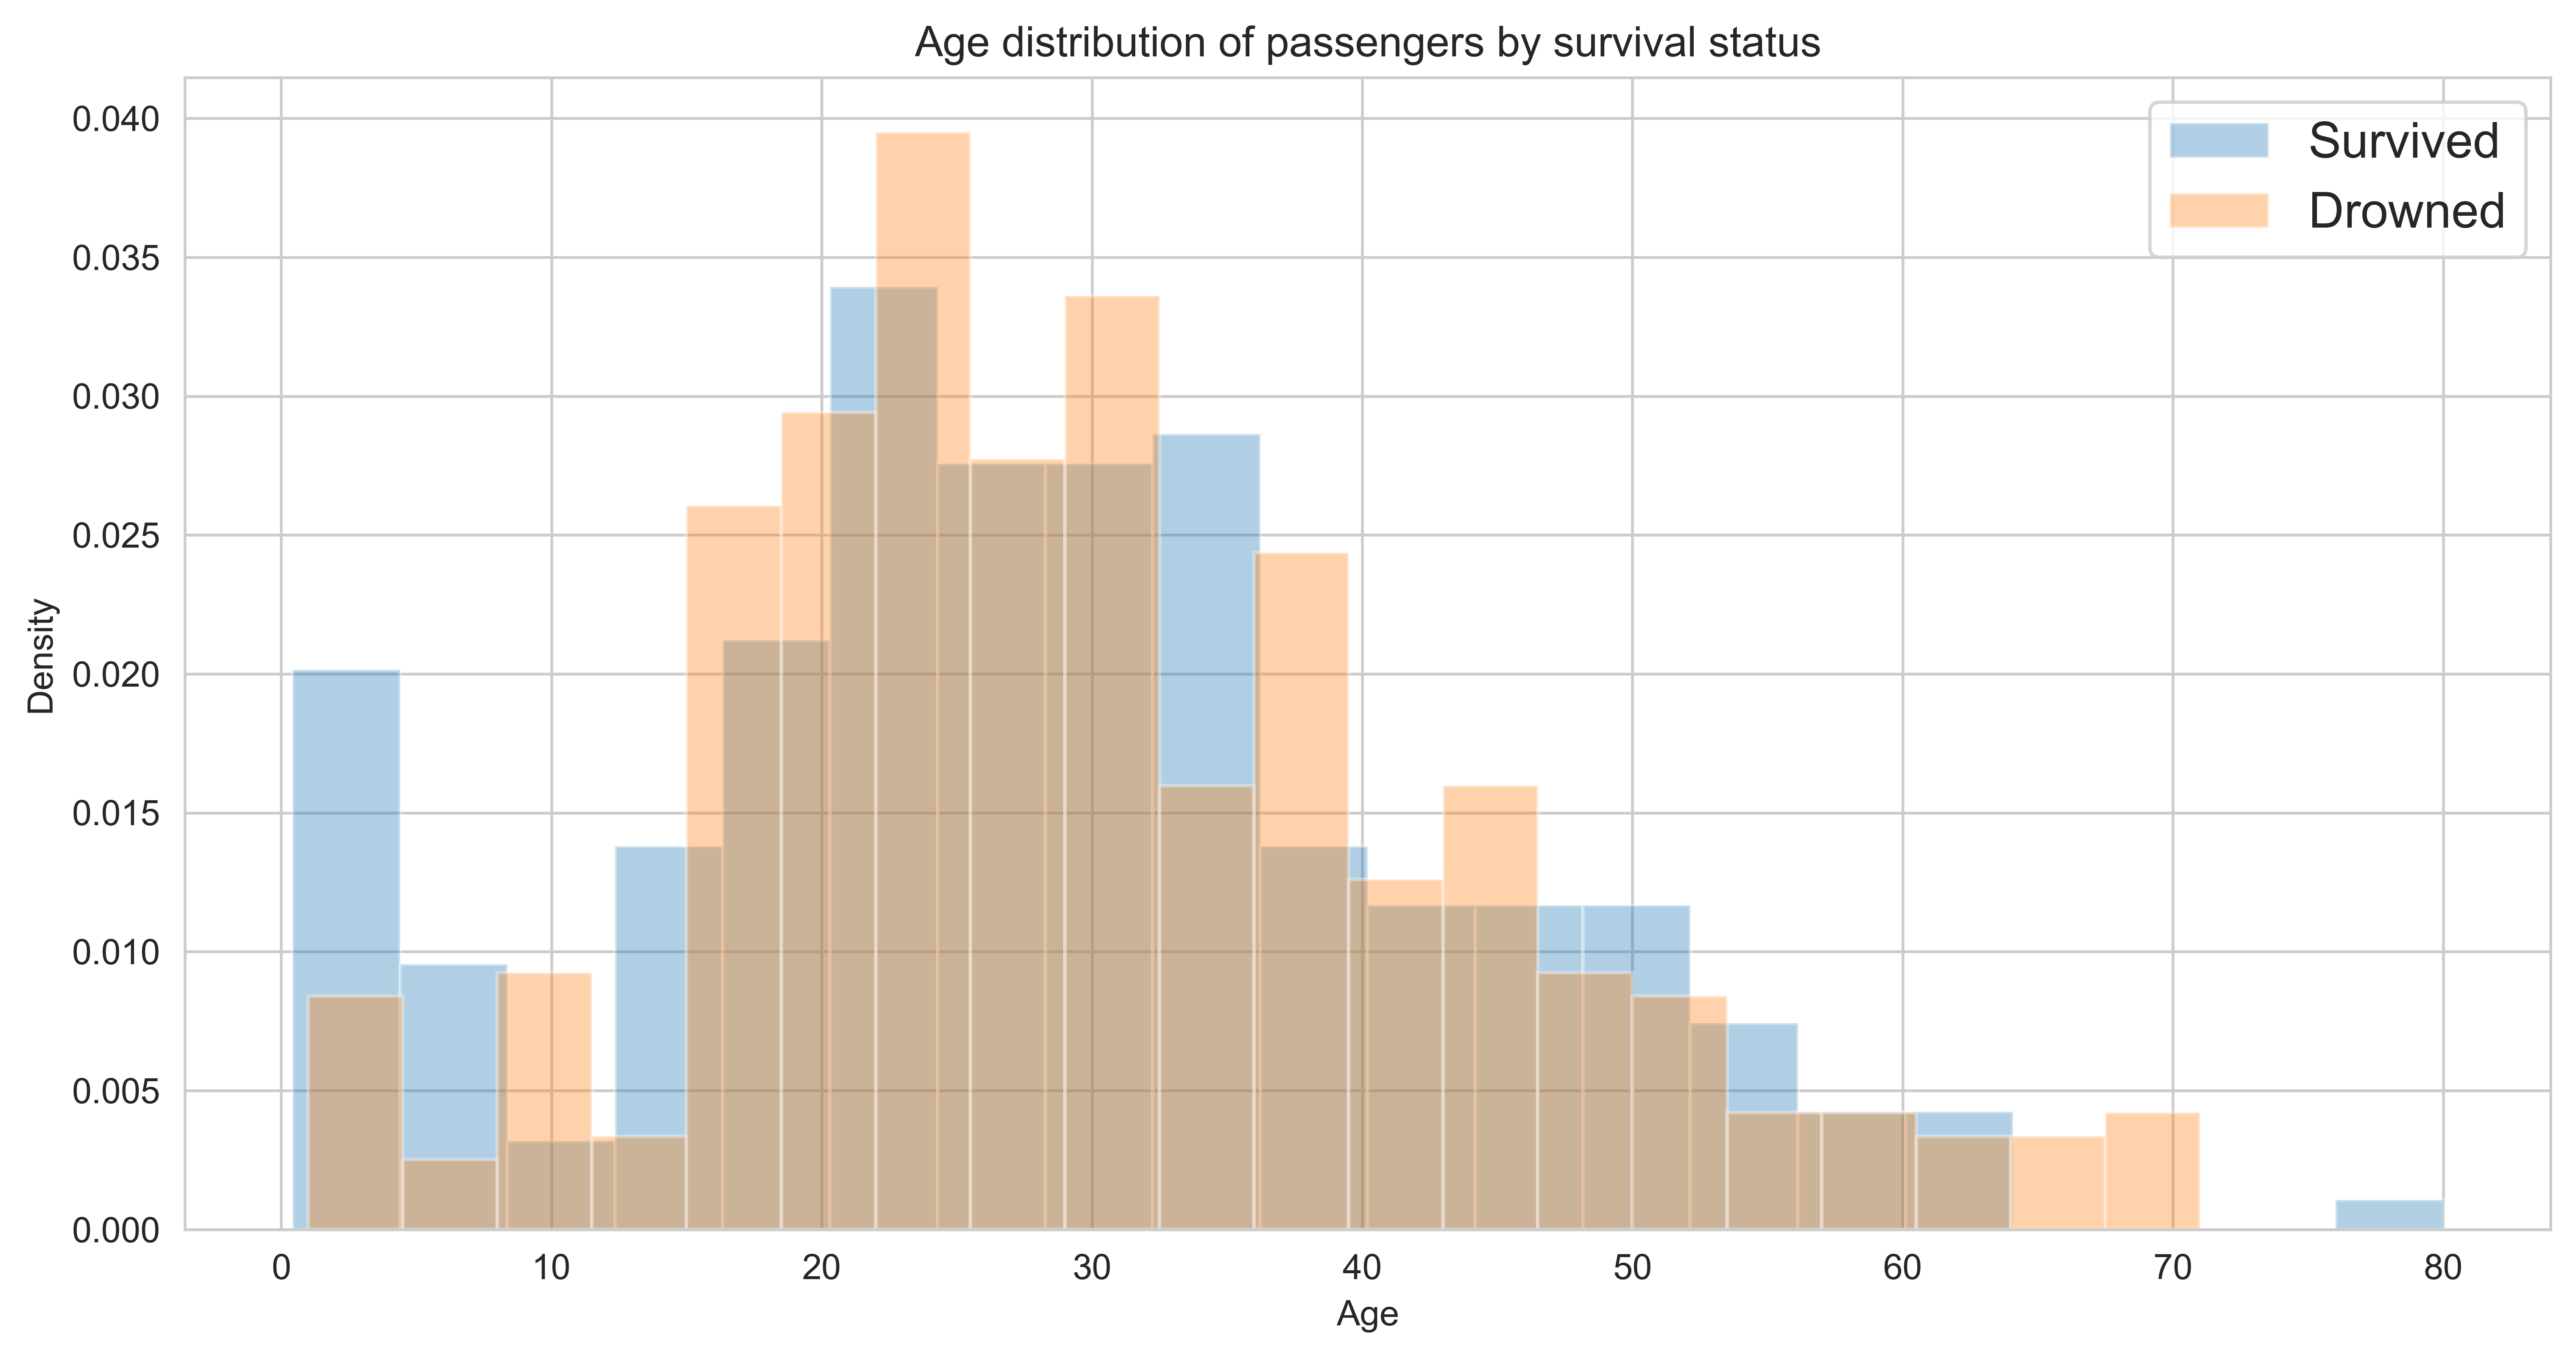

In [90]:
# Histogram of age distribution all passengers

plt.figure(figsize=(12, 6))

df_train['Age'].loc[df_train['Survived']==1].plot.hist(alpha=0.35, bins = 20, density = True, label ='Survived')
df_train['Age'].loc[df_train['Survived']==0].plot.hist(alpha=0.35, bins = 20, density = True, label ='Drowned') 


plt.legend(prop={'size': 14})
plt.title('Age distribution of passengers by survival status')
plt.xlabel('Age')
plt.ylabel('Density')


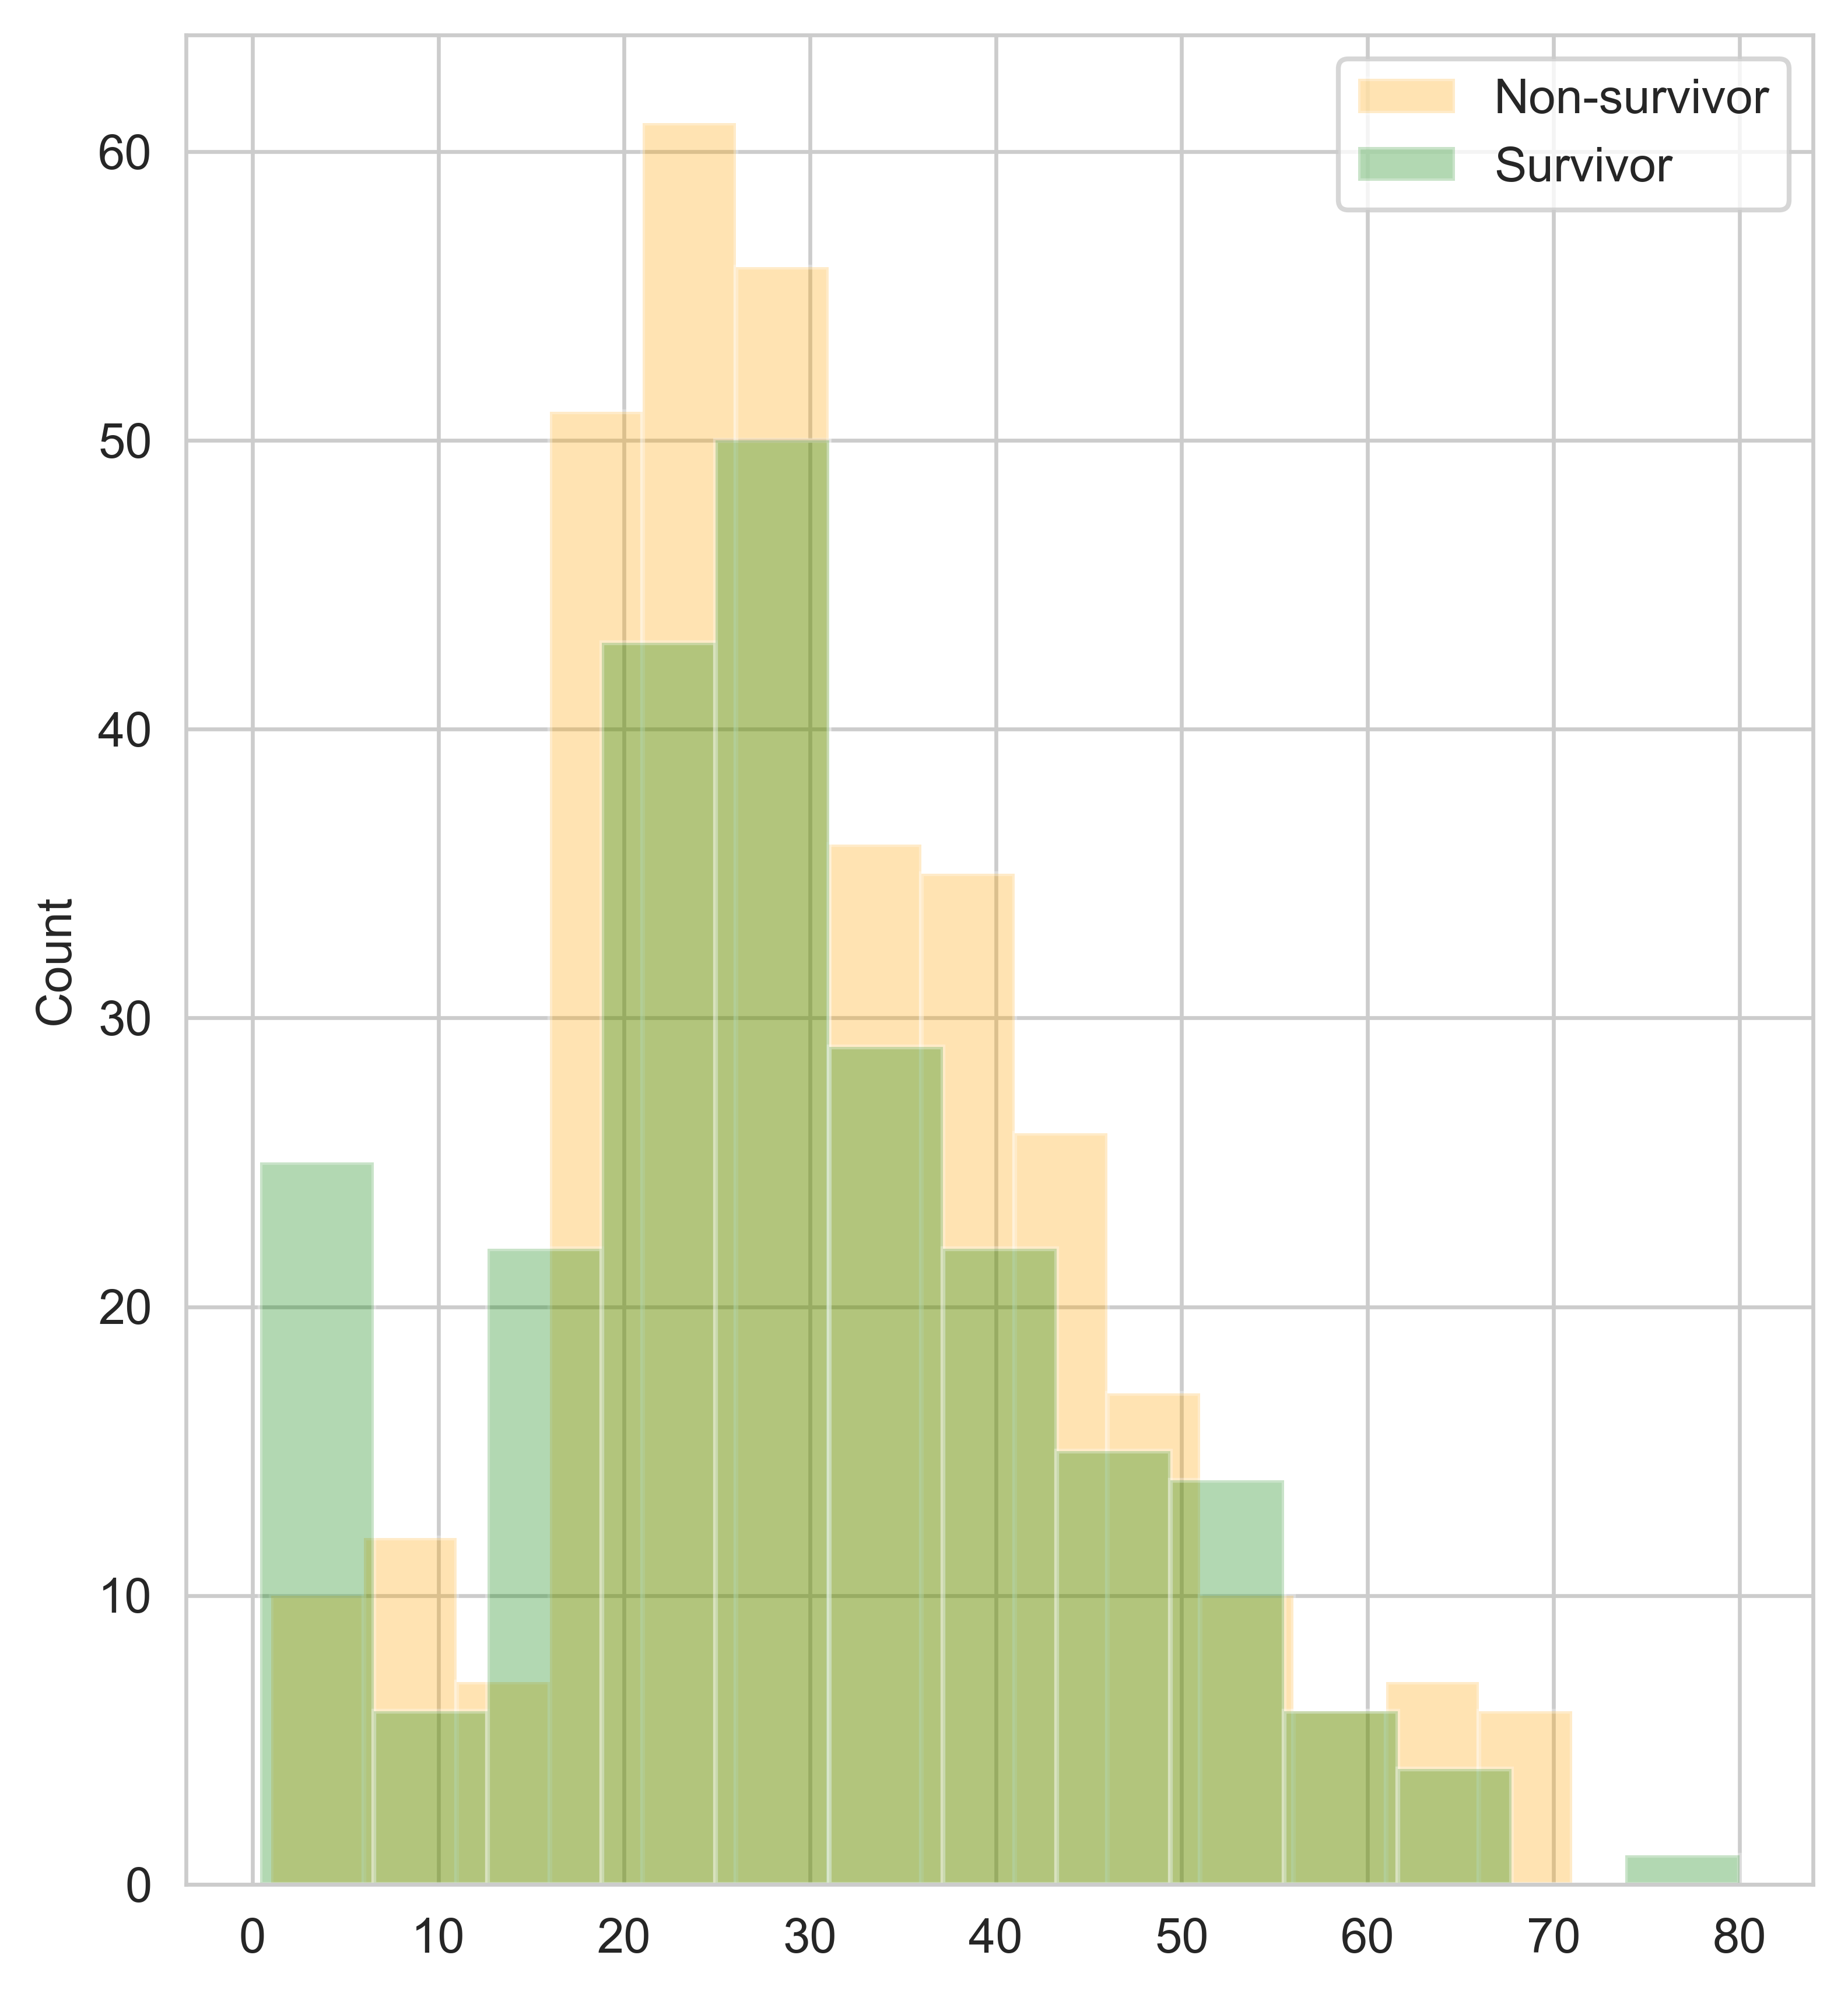

In [92]:

dead = df_train.loc[df_train.Survived == 0]
survived = df_train.loc[df_train.Survived == 1]
plt.hist(data = dead, x = 'Age', label = 'Non-survivor', alpha = 0.3, color = 'orange', bins = 'auto')
plt.hist(data = survived, x = 'Age', label = 'Survivor', alpha = 0.3, color ='green', bins = 'auto')

plt.legend(loc='upper right')
#plt.axis([0, 90, 0, 200])
plt.ylabel('Count')
plt.show()

<AxesSubplot:label='e72580e1-70f3-41f4-9bb0-ee1219e24dd6', xlabel='Age', ylabel='Count'>

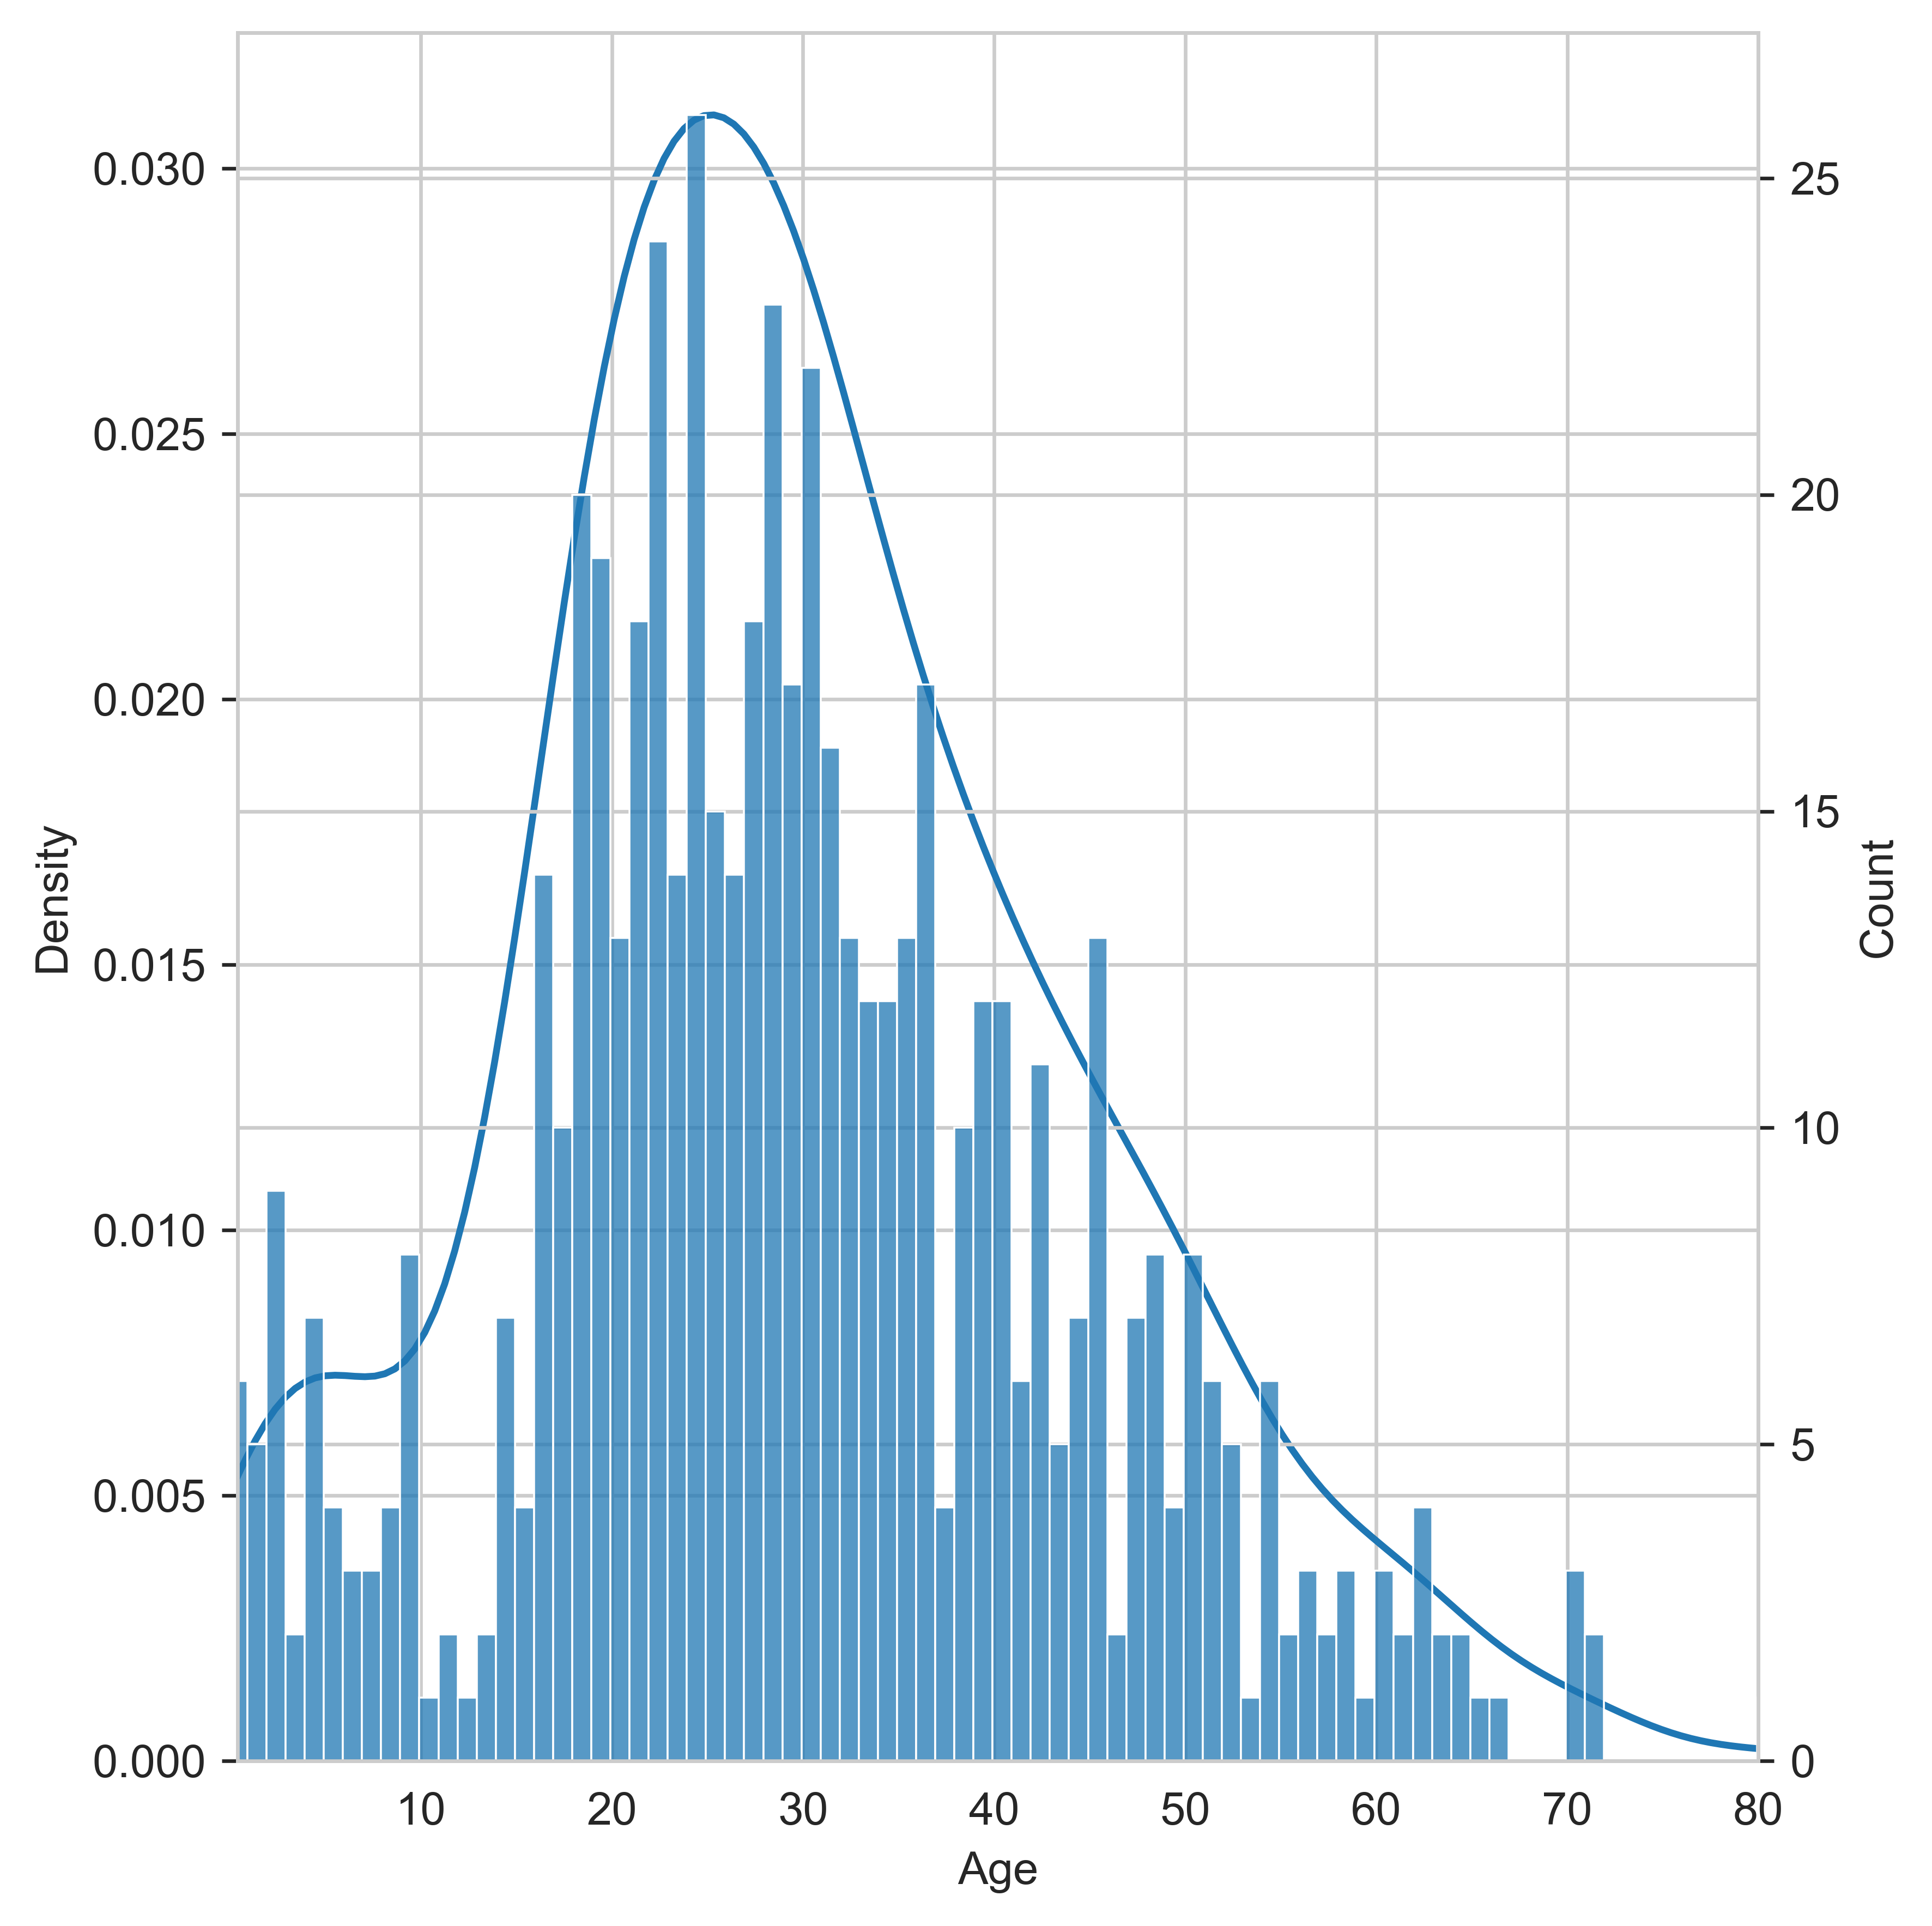

In [93]:
fig, ax1 = plt.subplots()
sns.kdeplot(data=df_train, x="Age", ax=ax1)
ax1.set_xlim((df_train["Age"].min(), df_train["Age"].max()))
ax2 = ax1.twinx()
sns.histplot(data=df_train, x="Age", discrete=True, ax=ax2)

#### Histogram of passengers by age and survival status

<AxesSubplot:label='22faa7b5-8366-4a7d-b2a2-d1919e33f6ae', xlabel='Age', ylabel='Count'>

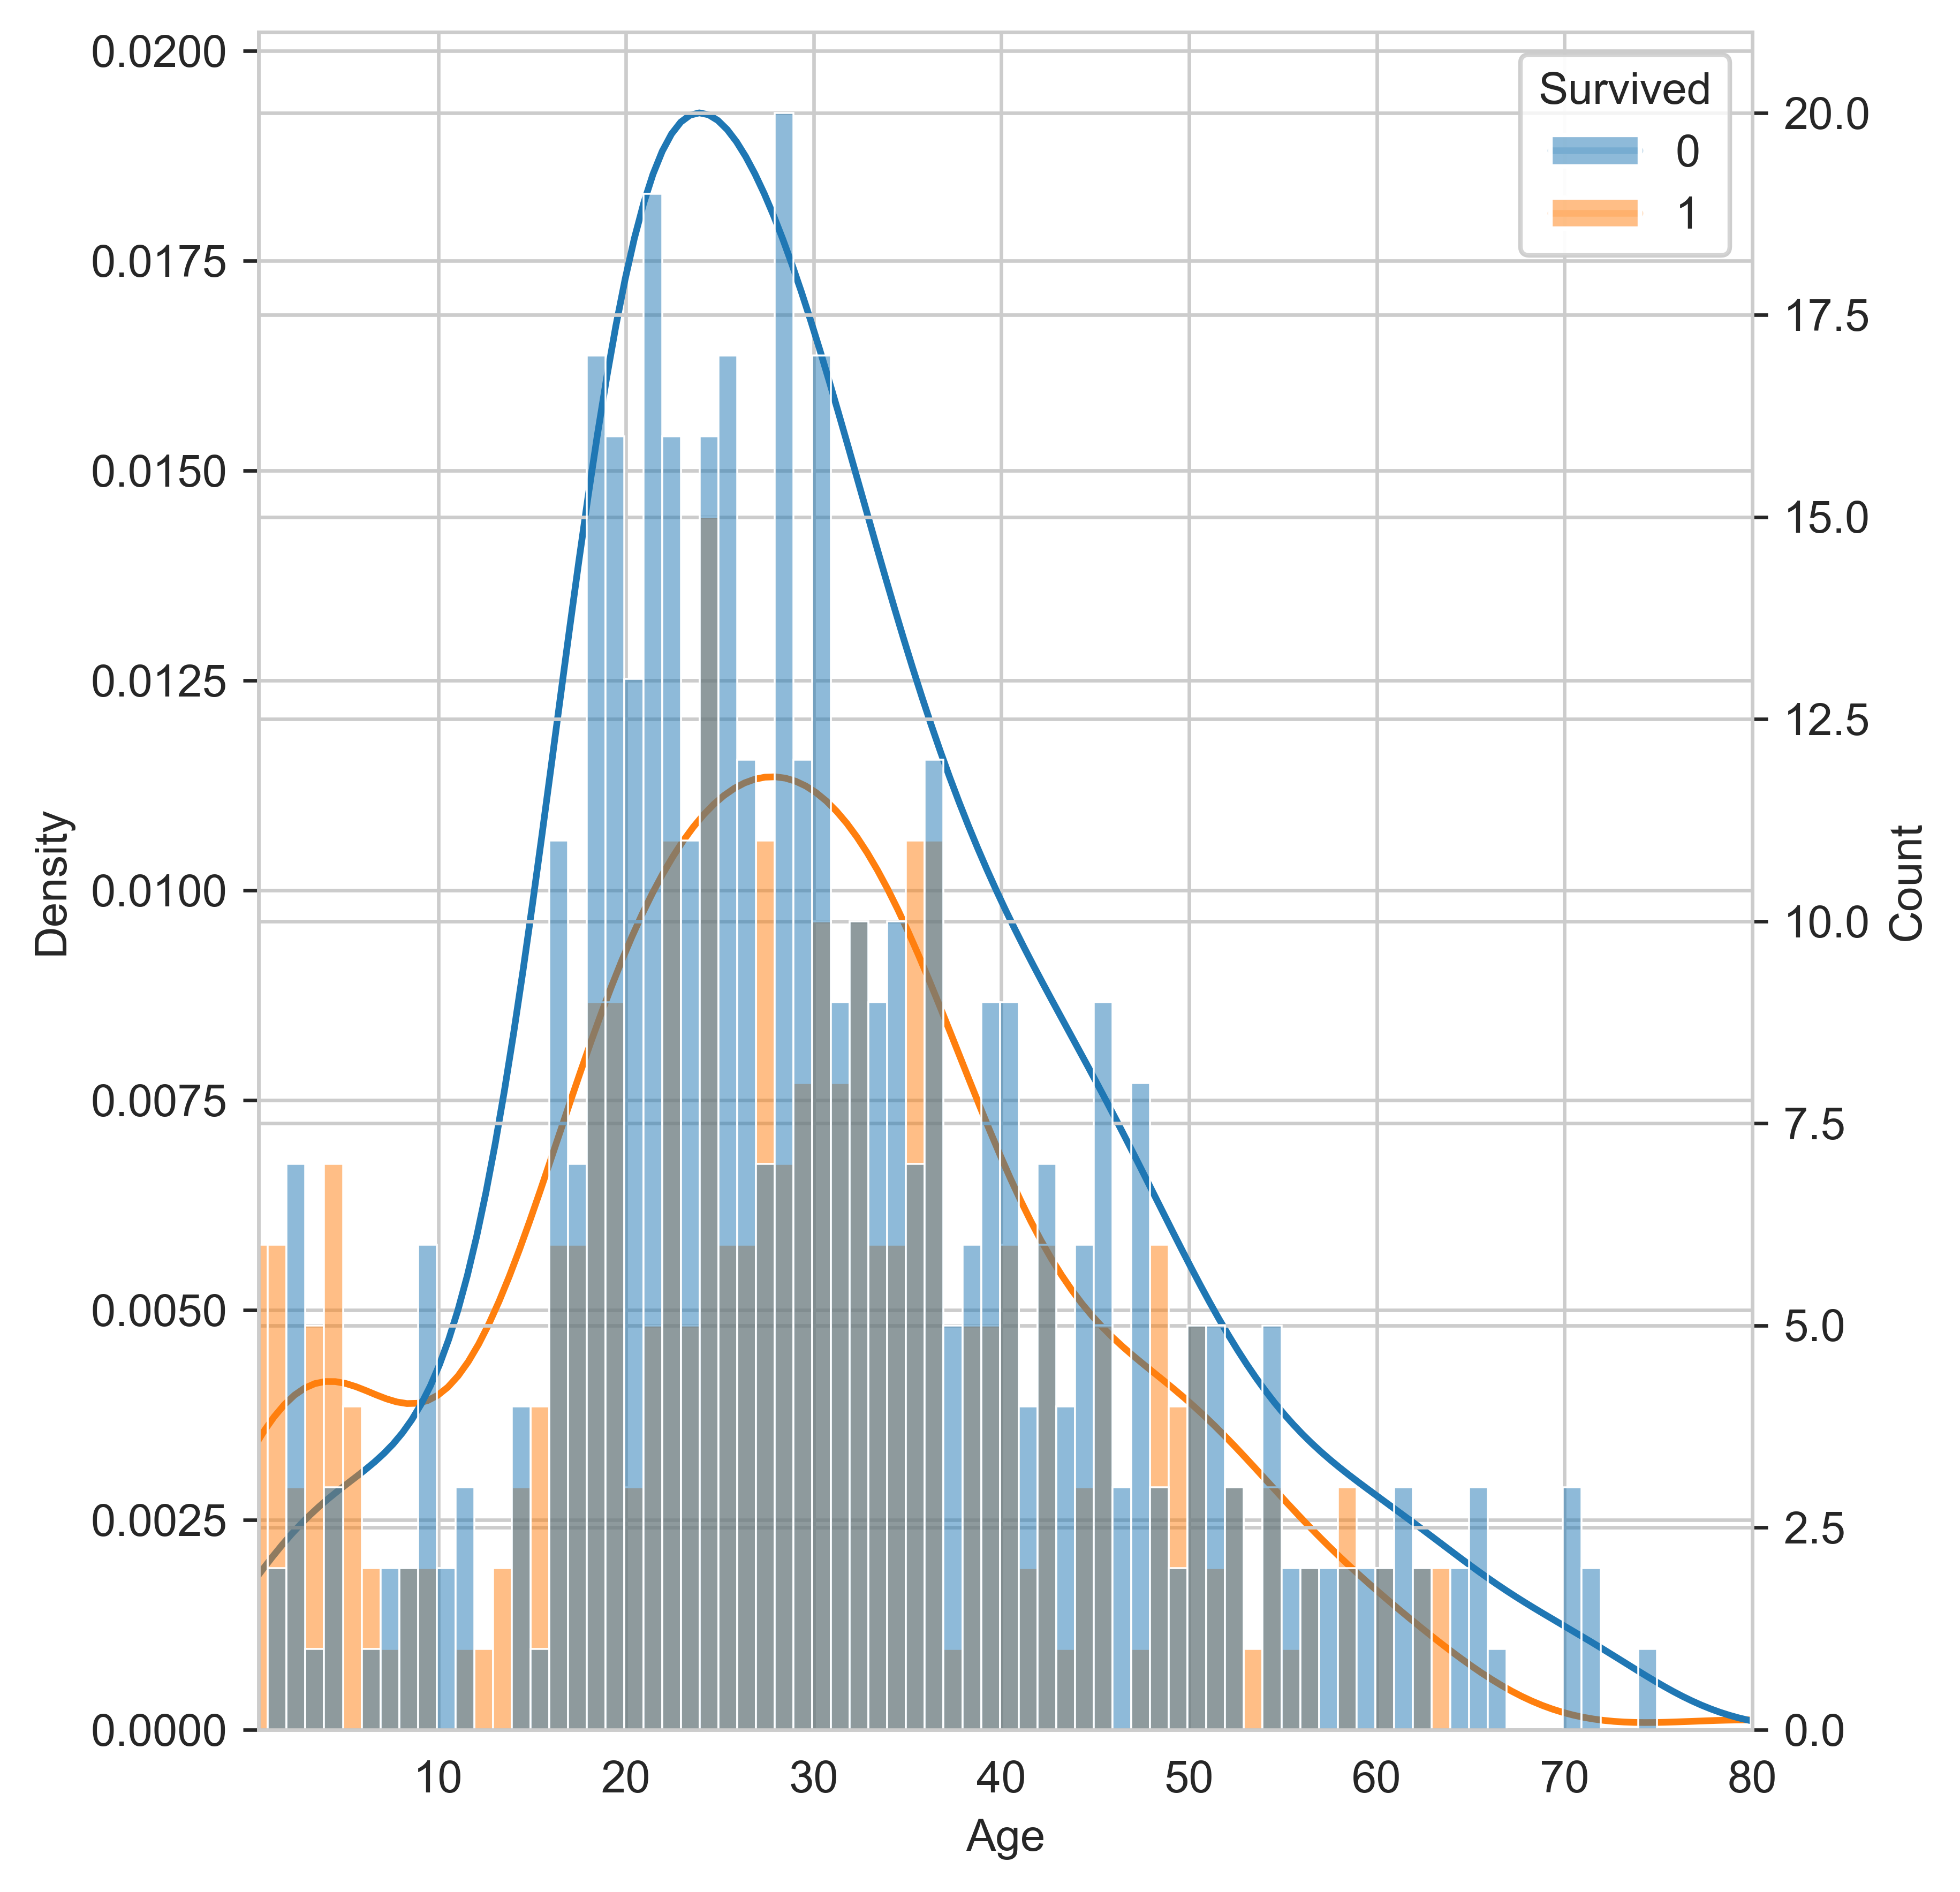

In [94]:
fig, ax1 = plt.subplots()
sns.kdeplot(data=df, x="Age", ax=ax1, hue = 'Survived')
ax1.set_xlim((df["Age"].min(), df["Age"].max()))
ax2 = ax1.twinx()
sns.histplot(data=df, x="Age", discrete=True, ax=ax2, hue ='Survived')

#### Scatterplot on age and fare

<AxesSubplot:xlabel='Fare', ylabel='Age'>

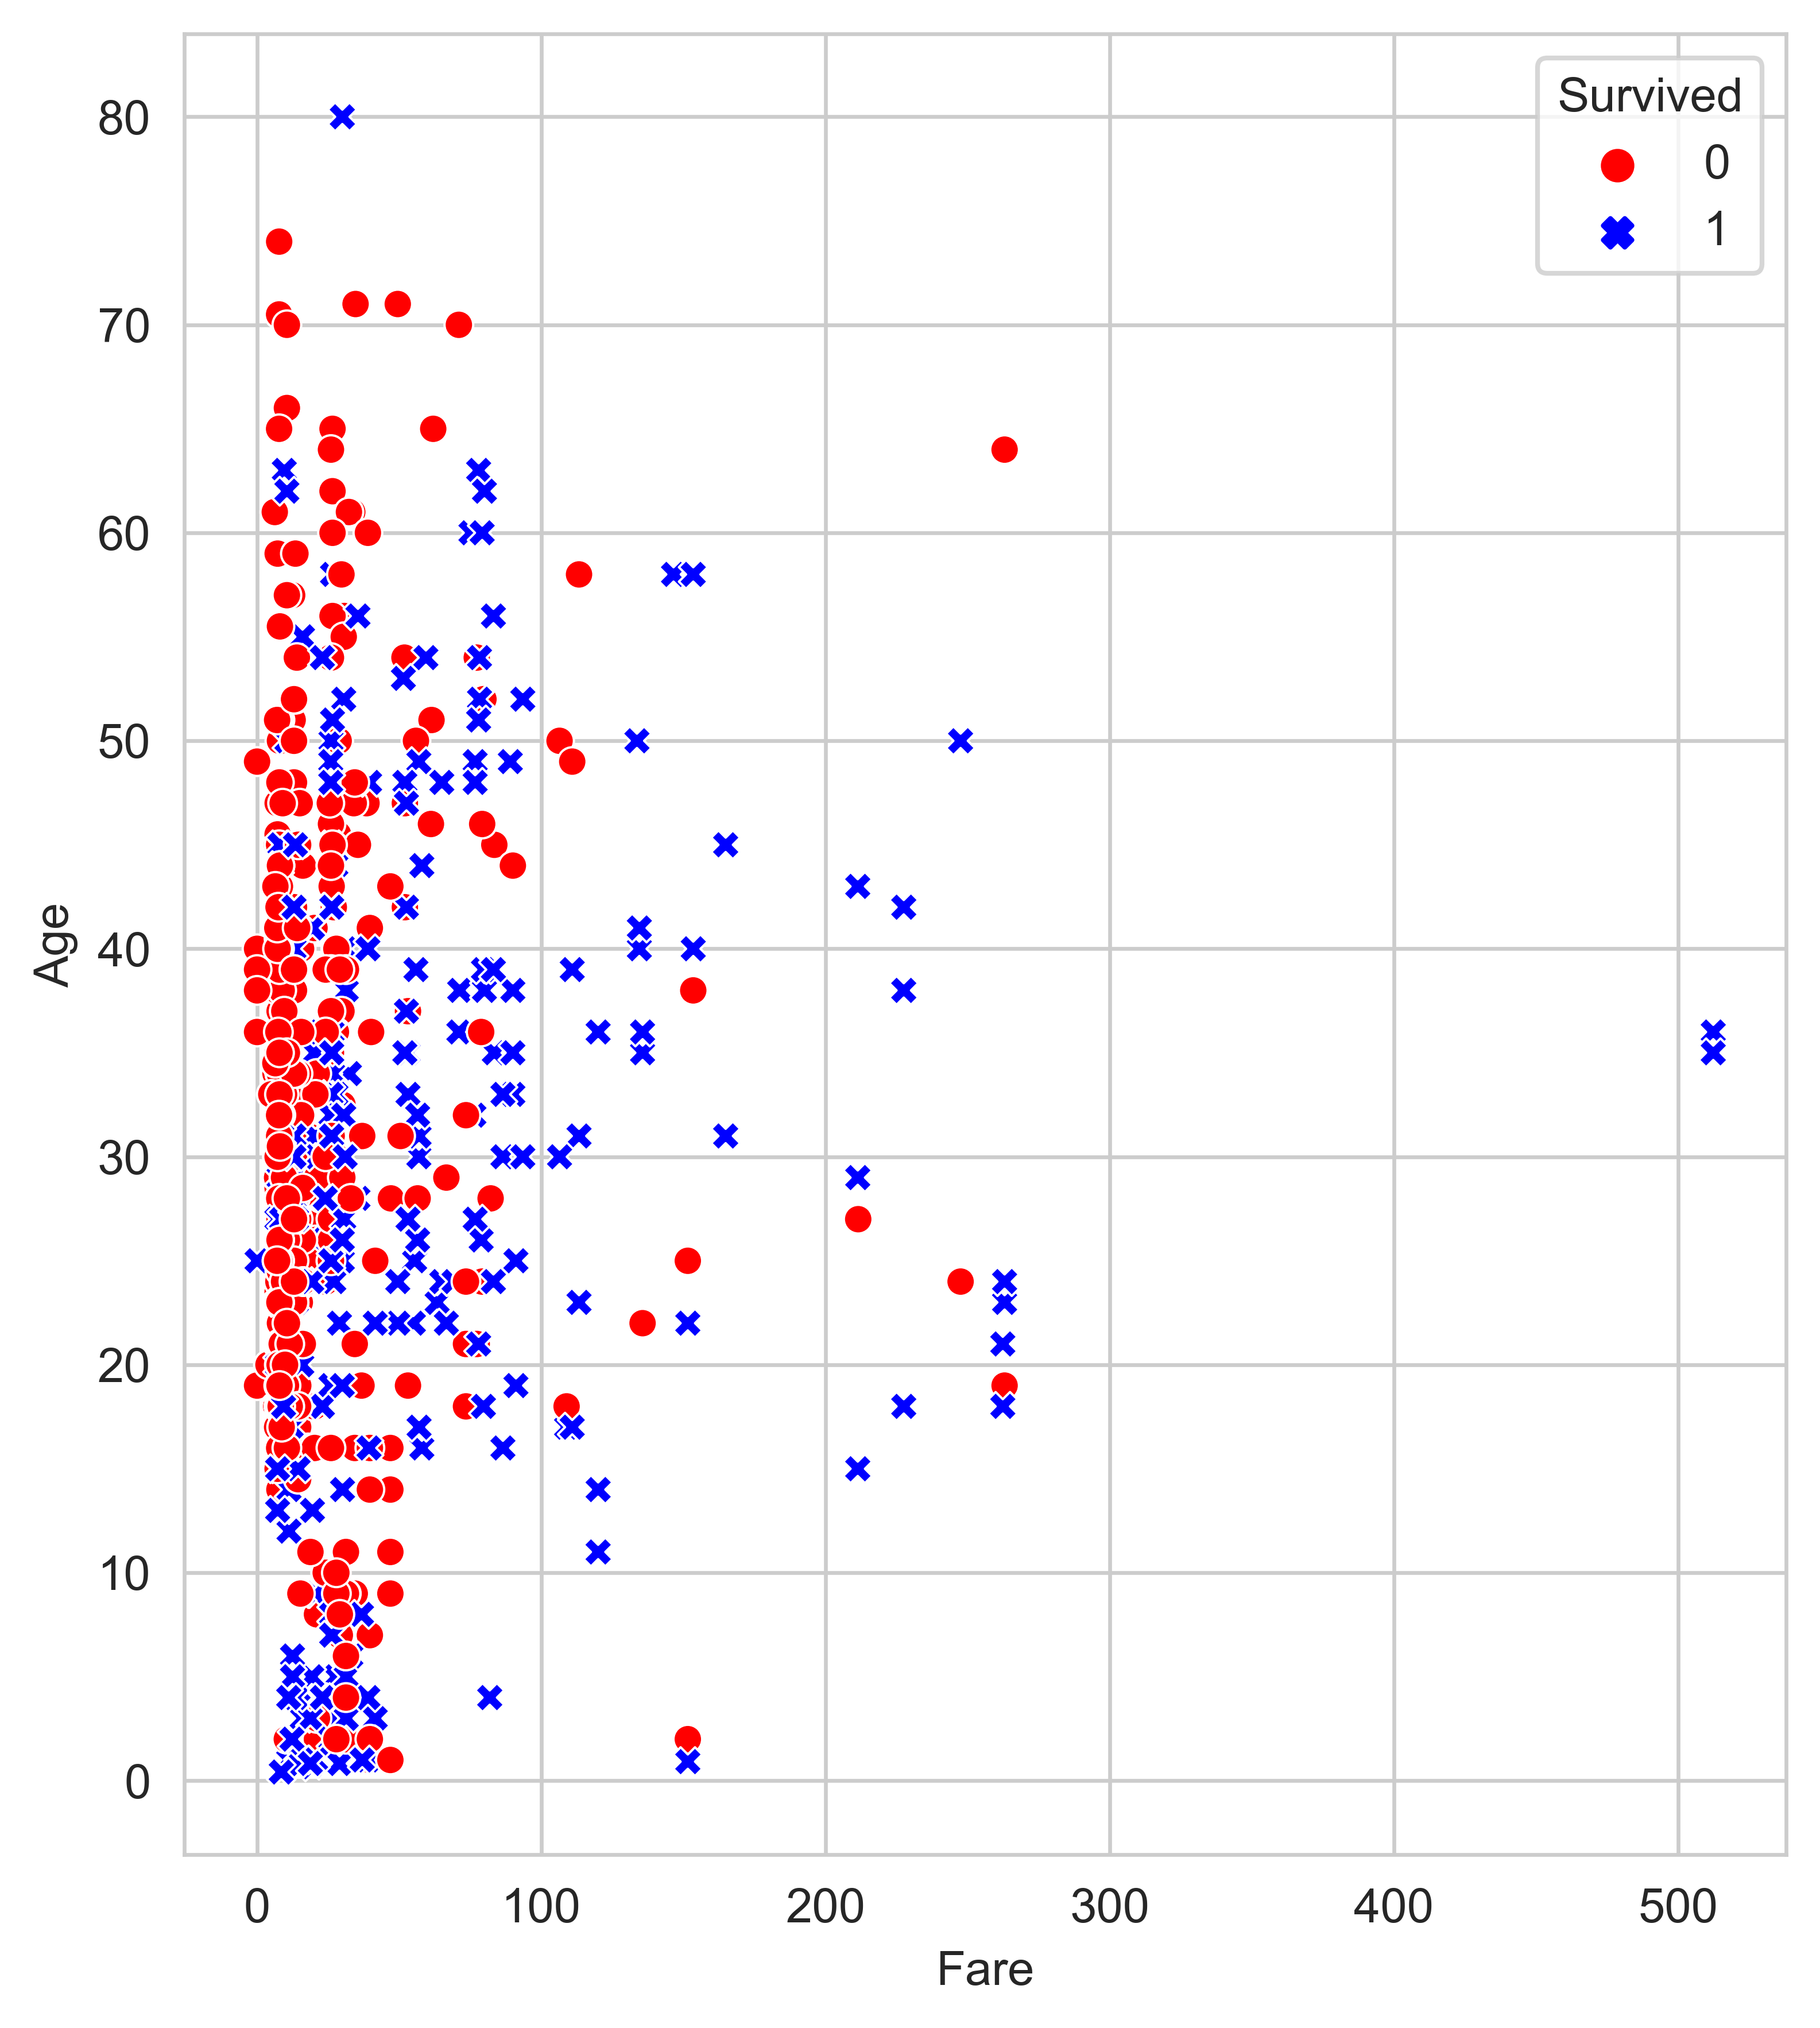

In [95]:
sns.scatterplot(x = 'Fare', y = 'Age', data = df, hue = 'Survived', style = 'Survived', palette= ['red', 'blue'])

### Conclusions from the exploratory data analysis

* There were significantly more casualties in the third class in comparison to the second and first class 
* Women, though aminority in passengers, were majority in survivals 


In short, the following groups were in the 'risk-group' of not surviving: 
1. Men
2. 3rd class passangers
3. Low-fare passengers (high correlation with point 2)
4. Old passengers (above 40/50ish) 

Less relevant:
* Passengers with no siblings had higher chance of survival?
* Having some parents/children on board increased chance of survival?
* being very young is good? 

Some of these have a potential to 'cancel each other out'?

### Ideas for feature engineering

1. Using the title --> search over entire list and get e.g. Dr., Col. Capt. etc. 
* would expect any military personnel to do worse (sacrifice?) or better (better skills?)

2. Cabin --> having a cabin deck 
* would expect having a cabin deck to increase chance of survival 

3. Family size vs Being alone on board - siblings + parents
* would expect people to do better if alone men, and worse if alone women 

4. Create 5 age classes - child: 0-5, child: 6-14, young: 15-30, Adult: 45-60, Old: 60-90
